In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import time

from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from phik import phik_matrix

#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#imbalanced methods
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Importing the Csv's for modeling

In [2]:
X_train_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/X_train_binary_2.csv', index_col='encounter_id')
X_val_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/X_val_binary_2.csv', index_col='encounter_id')
y_train_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/y_train_binary_2.csv', index_col='encounter_id')
y_val_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/y_val_binary_2.csv', index_col='encounter_id')

In [3]:
# test_binary_1_copy = test_binary_1.copy() 

In [4]:
# pd.set_option('display.max_columns', None)
# test_binary_1.head()

In [5]:
# test_binary_1.info()

In [6]:
# X_train_binary_1.columns = X_train_binary_1.columns.str.replace('[ ,]', '_', regex=True)
# X_val_binary_1.columns = X_val_binary_1.columns.str.replace('[ ,]', '_', regex=True)

In [7]:
X_train_binary_2.shape

(53427, 53)

# Feature Selection

Previous used columns:
'discharge_disposition_Discharged to home', 'inpatient_visits', 'outpatient_visits', 'emergency_visits', 'number_diagnoses',
'diabetes_meds_binary', 'average_pulse_bpm', 'number_of_medications', 'number_lab_tests', 'Midpoint_Age'

### Univariate Methods

In [8]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'outpatient_visits',
            'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

In [9]:
X_train_binary_2[metric_features].var()

average_pulse_bpm             530.336335
length_of_stay                  8.975235
number_lab_tests              384.826582
non_lab_procedures              2.909965
number_of_medications          65.495039
number_diagnoses                3.736187
number_generic_medications      0.845097
outpatient_visits               1.658062
emergency_visits                0.880346
inpatient_visits                1.609366
Midpoint_Age                  248.811535
Total_visits                    5.290838
Serious_condition_visits        3.098306
dtype: float64

Since the is no variance equal to 0, then there is no numerical variable that is univariate. With that in mind, we don´t need to drop any column. Adding to this, we can say that there are some numerical variables with high variance like Midpoint_Age, number_lab_tests and average_pulse_bpm (we could also say number_of_medications), and some with low variance like emergency_visits and number_prescriptions.

### Correlation indices

In [10]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [11]:
cor_spearman = X_train_binary_2[metric_features].corr(method='spearman')
cor_spearman

,average_pulse_bpm,length_of_stay,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,number_generic_medications,outpatient_visits,emergency_visits,inpatient_visits,Midpoint_Age,Total_visits,Serious_condition_visits
average_pulse_bpm,1.000000,0.001537,-0.001670,-0.004411,0.003625,-0.001355,0.000337,0.003741,0.000970,0.003707,0.005773,0.004777,0.004222
length_of_stay,0.001537,1.000000,0.333035,0.190399,0.462737,0.240230,0.086590,-0.011900,-0.003668,0.090804,0.121826,0.054182,0.078436
number_lab_tests,-0.001670,0.333035,1.000000,0.018434,0.246450,0.172129,0.028189,-0.021399,0.006584,0.041561,0.026678,0.017656,0.037854
non_lab_procedures,-0.004411,0.190399,0.018434,1.000000,0.348313,0.069969,-0.008855,-0.026964,-0.043619,-0.067057,-0.062524,-0.072914,-0.074928
number_of_medications,0.003625,0.462737,0.246450,0.348313,1.000000,0.296157,0.237336,0.071612,0.042457,0.098296,0.027265,0.107443,0.095771
number_diagnoses,-0.001355,0.240230,0.172129,0.069969,0.296157,1.000000,0.014665,0.111438,0.088748,0.135500,0.193520,0.168173,0.147681
number_generic_medications,0.000337,0.086590,0.028189,-0.008855,0.237336,0.014665,1.000000,0.004986,0.015773,-0.016267,-0.008502,0.000550,-0.008018
outpatient_visits,0.003741,-0.011900,-0.021399,-0.026964,0.071612,0.111438,0.004986,1.000000,0.178239,0.154406,0.025403,0.576391,0.191052
emergency_visits,0.000970,-0.003668,0.006584,-0.043619,0.042457,0.088748,0.015773,0.178239,1.000000,0.216654,-0.053709,0.460626,0.509054
inpatient_visits,0.003707,0.090804,0.041561,-0.067057,0.098296,0.135500,-0.016267,0.154406,0.216654,1.000000,0.015026,0.796030,0.921095


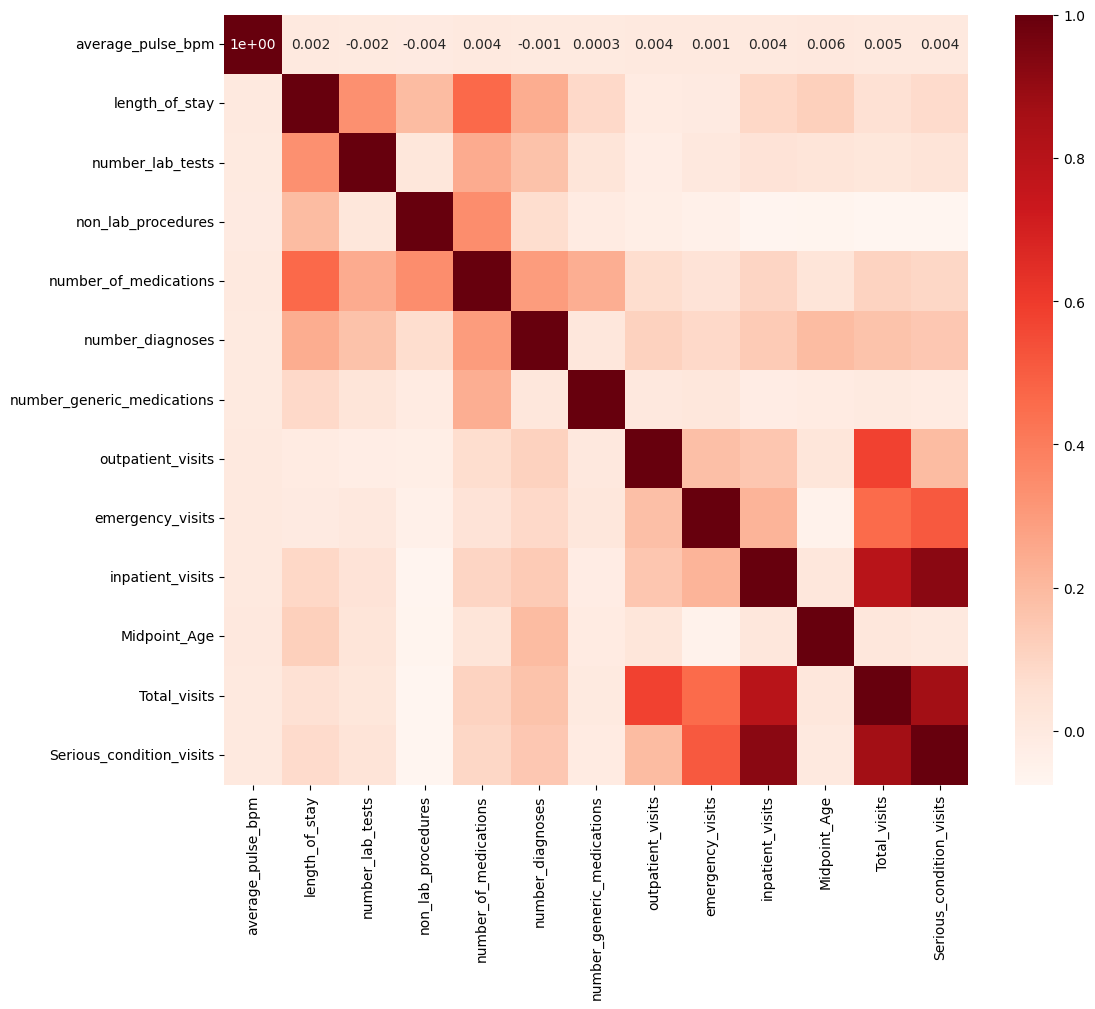

In [12]:
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There is one pair of variables that is significantly correlated:
    - length_of_stay vs number_of_medications (0.47) 
- Use inpatient_visits and emergency_visits and outpatient_visits OR
- Use Serious_condition_visists and outpatient_visits OR
- Use Total_visits

### Chi-square

In [13]:
# Before it was like that (Version 1.0):

- 'race_AfricanAmerican', 'race_Caucasian', 'race_Other';
- 'payer_code_HM','payer_code_MC', 'payer_code_None', 'payer_code_Other_code';
- 'admission_type_Elective','admission_type_Emergency','admission_type_Other_type','admission_type_Urgent';
- 'medical_specialty_Emergency/Trauma','medical_specialty_Family/GeneralPractice','medical_specialty_InternalMedicine','medical_specialty_Other_specialty', 'medical_specialty_Surgery','medical_specialty_Cardiology';
- 'discharge_disposition_Discharged to home','discharge_disposition_Expired', 'discharge_disposition_Other','discharge_disposition_Transferred to another medical facility','discharge_disposition_Unknown';
- 'admission_source_ Emergency Room','admission_source_ Physician Referral', 'admission_source_Other_source';
- 'primary_diagnosis_types_Diseases of the circulatory system','primary_diagnosis_types_Diseases of the digestive system','primary_diagnosis_types_Diseases of the respiratory system','primary_diagnosis_types_External causes of injury and supplemental classification','primary_diagnosis_types_Injury and poisoning','primary_diagnosis_types_Other_type','primary_diagnosis_types_Symptoms, signs, and ill-defined conditions';
- 'secondary_diagnosis_types_Diseases of the circulatory system','secondary_diagnosis_types_Diseases of the genitourinary system','secondary_diagnosis_types_Diseases of the respiratory system','secondary_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders','secondary_diagnosis_types_External causes of injury and supplemental classification','secondary_diagnosis_types_Other_type';
- 'additional_diagnosis_types_Diseases of the circulatory system','additional_diagnosis_types_Diseases of the genitourinary system','additional_diagnosis_types_Diseases of the respiratory system','additional_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders','additional_diagnosis_types_External causes of injury and supplemental classification','additional_diagnosis_types_Other_type';
- 'glucose_test_result_>200','glucose_test_result_>300', 'glucose_test_result_None', 'glucose_test_result_Norm';
- 'a1c_test_result_>7', 'a1c_test_result_>8','a1c_test_result_None', 'a1c_test_result_Norm';
- 'diabetes_meds_binary', 'change_in_meds_binary','is_normal_pulse', 'medication', 'gender_binary';
These were the columns that were considered important (the ones not here were discarted)

In [14]:
# We drop here the glucose test because its highly correlated with a1c test and a1c test are better for predicting if a patient
# has diabetes (glucose is instantenous and a1c is about the last 120 days)

In [15]:
# X_train_binary_2.drop(['glucose_test_result_High','glucose_test_result_Norm', 'glucose_test_result_Not_taken'],
#                       axis=1,inplace=True)
# X_val_binary_2.drop(['glucose_test_result_High','glucose_test_result_Norm', 'glucose_test_result_Not_taken'],
#                       axis=1,inplace=True)

In [16]:
X_train_binary_2.shape

(53427, 53)

In [17]:
X_val_binary_2.shape

(17809, 53)

### Visualize the weight of the dependent variable in categorical data

Based on the visualizations we have seen on the Cleaning&PreProcessing notebook (we in the future will merge the notebooks, but I think putting every visualization here will fill too much this notebook), these are the conclusions we take:

Columns that are not correlated with the target: 

- medication
- admission_type (maybe Emergency a bit)
- admission_source (maybe Emergency_room a bit)
- is_normal_pulse
- average_pulse_bpm
- gender_binary
- number_lab_tests
- number_prescriptions

Columns that have some correlation with the target: 

- race (other)
- MidPointAge
- discharge_disposition (Expired, Other, Transferred to another medical facility)
- medical_specialty (Cardiology)
- primary_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, Injury and poisoning)
- secondary_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, External causes of injury and supplemental classification)
- additional_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, Diseases of the genitourinary system)
- glucose_test_result (>300)
- a1c_test_result (None)
- diabetes_meds_binary
- change_in_meds_binary
- length_of_stay
- non_lab_procedures
- number_of_medications
- number_diagnoses
- emergency_visits
- inpatient_visits


Maybe yes/Maybe no: 

- payer_code
- outpatient_visits


### Point Biserial Correlation

More than 0.01 Corr: 
- length_of_stay
- number_lab_tests 
- non_lab_procedures 
- number_of_medications 
- number_diagnoses 
- outpatient_visits 
- emergency_visits 
- inpatient_visits

### Recursive Feature Selection

In [18]:
y_train_binary_2 = y_train_binary_2[y_train_binary_2.columns[0]].map({'Yes': 1, 'No': 0})
y_val_binary_2 = y_val_binary_2[y_val_binary_2.columns[0]].map({'Yes': 1, 'No': 0})

In [19]:
X_train_binary_2.drop(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
'payer_code_None', 'payer_code_UN', 'admission_type_Elective',  'discharge_disposition_Other',
'discharge_disposition_Transferred_to_another_medical_facility',
'admission_source_Emergency_Room', 'admission_source_Other_source',
'admission_source_Referral','glucose_test_result_High',
'glucose_test_result_Norm','glucose_test_result_Not_taken','Total_visits', 'Serious_condition_visits'], axis=1, inplace=True)
X_val_binary_2.drop(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
'payer_code_None', 'payer_code_UN', 'admission_type_Elective',  'discharge_disposition_Other',
'discharge_disposition_Transferred_to_another_medical_facility',
'admission_source_Emergency_Room', 'admission_source_Other_source',
'admission_source_Referral','glucose_test_result_High',
'glucose_test_result_Norm','glucose_test_result_Not_taken','Total_visits', 'Serious_condition_visits'], axis=1, inplace=True)

In [20]:
min_max_before = MinMaxScaler()
X_train_min_max_before = min_max_before.fit_transform(X_train_binary_2)
X_val_min_max_before = min_max_before.transform(X_val_binary_2)

In [24]:
#no of features
nof_list=np.arange(10,25)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(class_weight = 'balanced', solver = 'saga', random_state=19, n_jobs=-1, max_iter=200)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_min_max_before,y_train_binary_2)
    X_val_rfe = rfe.transform(X_val_min_max_before)
    model.fit(X_train_rfe,y_train_binary_2)
    
    #storing results on training data
    y_train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_train_binary_2, y_train_pred, average='binary')
    train_score_list.append(train_score)
    
    #storing results on validation data
    y_val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val_binary_2, y_val_pred, average='binary')
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
    
    print("Selected Features: %s" % rfe.support_)
    print("Validation score:", val_score)
    print("Feature Ranking: %s" % rfe.ranking_)
    
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Selected Features: [False False False  True  True False False False False False  True False
 False False False False False False  True  True  True False False False
 False  True  True False  True False False False False  True False False]
Validation score: 0.2628477133427628
Feature Ranking: [17 13 23  1  1  7 20  4  6  8  1 16 19  2 14 25 24 18  1  1  1 22 15 27
  5  1  1 11  1 10 21  3 26  1 12  9]
Selected Features: [False False False  True  True False False False False False  True False
 False  True False False False False  True  True  True False False False
 False  True  True False  True False False False False  True False False]
Validation score: 0.26357319514780353
Feature Ranking: [16 12 22  1  1  6 19  3  5  7  1 15 18  1 13 24 23 17  1  1  1 21 14 26
  4  1  1 10  1  9 20  2 25  1 11  8]
Selected Features: [False False False  True  True False False False False False  True False
 False  True False False False False  True  True  True False False False
 False  True  True False  

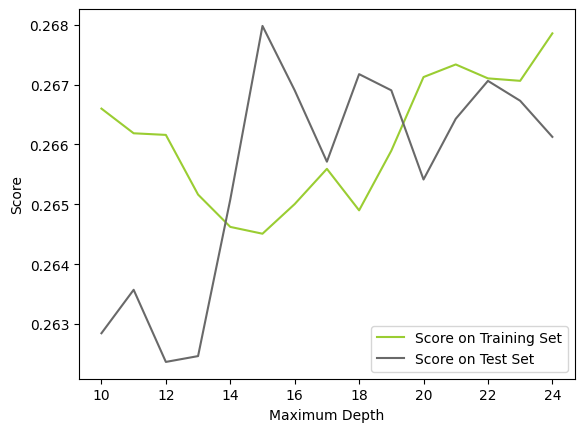

In [25]:
plt.plot(list(range(10,25)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(10,25)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [26]:
# No Feature Selection
lr = LogisticRegression(class_weight = 'balanced', solver = 'saga', random_state=19, n_jobs=-1, max_iter=50)
lr.fit(X_train_min_max_before, y_train_binary_2)

# Predict on training set and calculate F1 score
y_guess = lr.predict(X_train_min_max_before)
print("F1 Score (No Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = lr.predict(X_val_min_max_before)
print("F1 Score (No Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

F1 Score (No Feature Selection) on train: 0.26678277390753635
F1 Score (No Feature Selection) on val: 0.26709477940302057


In [31]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=22)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['medical_specialty_Cardiology', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Diabetes', 'primary_diagnosis_types_Musculoskeletal', 'primary_diagnosis_types_Respiratory', 'secondary_diagnosis_types_Diabetes', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 'number_generic_medications', 'metformin', 'Midpoint_Age', 'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance']
F1 Score (With Feature Selection) on train: 0.2671040670329236
F1 Score (With Feature Selection) on val: 0.26706231454005935


In [27]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Musculoskeletal', 'primary_diagnosis_types_Respiratory', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'Midpoint_Age', 'presc_diabetes_meds_binary']
F1 Score (With Feature Selection) on train: 0.2645097652396922
F1 Score (With Feature Selection) on val: 0.26798006171374317


In [28]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=14)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Musculoskeletal', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'Midpoint_Age', 'presc_diabetes_meds_binary']
F1 Score (With Feature Selection) on train: 0.2646236262654114
F1 Score (With Feature Selection) on val: 0.26508030933967874


In [29]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=13)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Musculoskeletal', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'Midpoint_Age', 'presc_diabetes_meds_binary']
F1 Score (With Feature Selection) on train: 0.26516341923318665
F1 Score (With Feature Selection) on val: 0.2624659481227052


In [30]:
#no of features
nof_list=np.arange(15,35)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = RandomForestClassifier()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_min_max_before,y_train_binary_2)
    X_val_rfe = rfe.transform(X_val_min_max_before)
    model.fit(X_train_rfe,y_train_binary_2)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_binary_2)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val_binary_2)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
    
    print("Selected Features: %s" % rfe.support_)
    print("Validation score:", val_score)
    print("Feature Ranking: %s" % rfe.ranking_)
    
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Selected Features: [False False False False False False False  True False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False  True  True  True
  True  True  True  True  True  True False  True False False False  True
  True False False]
Validation score: 0.888483351114605
Feature Ranking: [28 33 22  5  2 35 15  1 25  1 14 37 29 20  3 23 10 18 16 30 11 12 26  7
 17 32  1 34 36 24 19 27  9  1  1  1  1  1  1  1  1  1  4  1 21  8 13  1
  1 31  6]
Selected Features: [False False False False  True False False  True False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False  True  True  True
  True  True  True  True  True  True False  True False False False  True
  True False False]
Validation score: 0.8883148969622101
Feature Ranking: [26 32 20  5  1 34 14  1 24  1 13 36 28 19  2 22  9 17 16 29 11 10 25  6
 

KeyboardInterrupt: 

In [ ]:
plt.plot(list(range(15,35)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(15,35)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [17]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=18)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['payer_code_UN', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'primary_diagnosis_types_Diabetes', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'Midpoint_Age', 'presc_diabetes_meds_binary', 'Total_visits', 'Serious_condition_visits']
F1 Score (With Feature Selection) on train: 0.2643908181283108
F1 Score (With Feature Selection) on val: 0.265792610250298


In [18]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 18
Selected Features: [False False False False False  True False False False False  True  True
  True  True False False False  True False False False False  True False
 False  True False False False False False False False  True  True  True
 False False False False  True  True False  True False False  True False
  True False False  True  True]
Feature Ranking: [11 16 19 36 32  1 33 18 35 28  1  1  1  1  8 20  7  1 26  3  4  2  1 23
 21  1 14 24 34  6 30 29 17  1  1  1 27 12 31  5  1  1 13  1 22 10  1 25
  1 15  9  1  1]


In [19]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'presc_diabetes_meds_binary', 'Total_visits', 'Serious_condition_visits']
F1 Score (With Feature Selection) on train: 0.26632262100242393
F1 Score (With Feature Selection) on val: 0.2680387982020345


In [20]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 15
Selected Features: [False False False False False False False False False False  True  True
  True  True False False False False False False False False  True False
 False  True False False False False False False False  True  True  True
 False False False False  True  True False  True False False False False
  True False False  True  True]
Feature Ranking: [14 19 22 39 35  3 36 21 38 31  1  1  1  1 11 23 10  4 29  6  7  5  1 26
 24  1 17 27 37  9 33 32 20  1  1  1 30 15 34  8  1  1 16  1 25 13  2 28
  1 18 12  1  1]


#### Random Forest

In [21]:
# No Feature Selection
rf = RandomForestClassifier(random_state=19, n_jobs=-1)
rf.fit(X_train_min_max_before, y_train_binary_2)

# Predict on training set and calculate F1 score
y_guess = rf.predict(X_train_min_max_before)
print("F1 Score (No Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rf.predict(X_val_min_max_before)
print("F1 Score (No Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

F1 Score (No Feature Selection) on train: 0.9998322429122631
F1 Score (No Feature Selection) on val: 0.016790123456790124


In [22]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=18)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['medical_specialty_Other_specialty', 'admission_source_Emergency_Room', 'additional_diagnosis_types_Other', 'outpatient_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 'number_generic_medications', 'Midpoint_Age', 'gender_binary', 'Has_Insurance', 'Total_visits', 'Serious_condition_visits']
F1 Score (With Feature Selection) on train: 0.999580501719943
F1 Score (With Feature Selection) on val: 0.016815034619188925


In [23]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 18
Selected Features: [False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False  True False False False False False False  True False  True
  True  True  True  True  True  True  True  True False False  True  True
 False False  True  True  True]
Feature Ranking: [30 32 24  4 14 34 17  2 25  1 10 36 27 20  1 22  7 15 18 29  9 11 23  6
 16 31  1 33 35 26 19 28  8  1 12  1  1  1  1  1  1  1  1  1  5 13  1  1
 21  3  1  1  1]


In [24]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=15)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['medical_specialty_Other_specialty', 'admission_source_Emergency_Room', 'additional_diagnosis_types_Other', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'Midpoint_Age', 'gender_binary', 'Total_visits', 'Serious_condition_visits']
F1 Score (With Feature Selection) on train: 0.999580501719943
F1 Score (With Feature Selection) on val: 0.017795353435491844


In [25]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 15
Selected Features: [False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False  True False False False False False False False False  True
  True  True  True  True  True  True False  True False False  True  True
 False False False  True  True]
Feature Ranking: [33 35 27  7 17 37 20  5 28  1 13 39 30 23  1 25 10 18 21 32 12 14 26  9
 19 34  1 36 38 29 22 31 11  4 15  1  1  1  1  1  1  1  3  1  8 16  1  1
 24  6  2  1  1]


### Sequential Feature Selection

In [26]:
# Sequential Feature Selection
sfs = SequentialFeatureSelector(lr, k_features='best', scoring='f1', n_jobs=-1)
sfs.fit(X_train_min_max_before, y_train_binary_2)
# y_guess = sfs.predict(X_train)
features = list(sfs.k_feature_names_)
print(sfs.k_score_)

0.2674942750335718


In [27]:
lr.fit(X_train_min_max_before, y_train_binary_2)
y_score = lr.predict(X_val_min_max_before)

#save features
print("F1 score With Feature Selection:",f1_score(y_val_binary_2, y_score))
print('Selected features:', str(len(features)))

F1 score With Feature Selection: 0.2739036664270309
Selected features: 15


In [28]:
features

['4',
 '10',
 '11',
 '12',
 '13',
 '17',
 '22',
 '31',
 '33',
 '34',
 '45',
 '47',
 '48',
 '50',
 '52']

In [29]:
features_indexes = [int(i) for i in features]  
features_names = X_train_binary_2.columns[features_indexes]
filtered_train = X_train_binary_2[features_names]
filtered_val = X_val_binary_2[features_names]

In [30]:
filtered_train.columns

Index(['payer_code_None', 'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'primary_diagnosis_types_Diabetes',
       'secondary_diagnosis_types_Neoplasms', 'a1c_test_result_Norm',
       'outpatient_visits', 'emergency_visits', 'metformin', 'gender_binary',
       'presc_diabetes_meds_binary', 'Has_Insurance',
       'Serious_condition_visits'],
      dtype='object')

In [31]:
sfs = SequentialFeatureSelector(rf, k_features='best', scoring='f1', n_jobs=-1)
sfs.fit(X_train_min_max_before, y_train_binary_2)
# y_guess = sfs.predict(X_train)
features = list(sfs.k_feature_names_)
print(sfs.k_score_)

0.11006709836010135


In [32]:
rf.fit(X_train_min_max_before, y_train_binary_2)
y_score = rf.predict(X_val_min_max_before)

#save features
print("F1 score With Feature Selection:",f1_score(y_val_binary_2, y_score))
print('Selected features:', str(len(features)))

F1 score With Feature Selection: 0.016790123456790124
Selected features: 11


In [33]:
features

['2', '7', '8', '11', '12', '15', '22', '30', '36', '40', '52']

In [34]:
features_indexes = [int(i) for i in features]  
features_names = X_train_binary_2.columns[features_indexes]
filtered_train = X_train_binary_2[features_names]
filtered_val = X_val_binary_2[features_names]

In [35]:
filtered_train.columns

Index(['payer_code_HM', 'admission_type_Urgent/Emergency',
       'medical_specialty_Cardiology', 'discharge_disposition_Expired',
       'discharge_disposition_Other', 'admission_source_Other_source',
       'secondary_diagnosis_types_Neoplasms', 'a1c_test_result_High',
       'average_pulse_bpm', 'number_of_medications',
       'Serious_condition_visits'],
      dtype='object')

### Feature Importance with Extra Trees Classifier

In [53]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train_min_max_before, y_train_binary_2)

ExtraTreesClassifier(n_estimators=10)

In [54]:
intermediate_dictionary = {'Column name':X_train_binary_2.columns, 'Feature Importance':model.feature_importances_}

feature_importance_df = pd.DataFrame(intermediate_dictionary)
feature_importance_df.sort_values('Feature Importance', ascending=False, inplace=True)

In [55]:
feature_importance_df

,Column name,Feature Importance
36,average_pulse_bpm,0.070437
38,number_lab_tests,0.068545
40,number_of_medications,0.067311
37,length_of_stay,0.058715
46,Midpoint_Age,0.056325
39,non_lab_procedures,0.047603
41,number_diagnoses,0.047207
35,inpatient_visits,0.034270
51,Total_visits,0.033741
52,Serious_condition_visits,0.031445


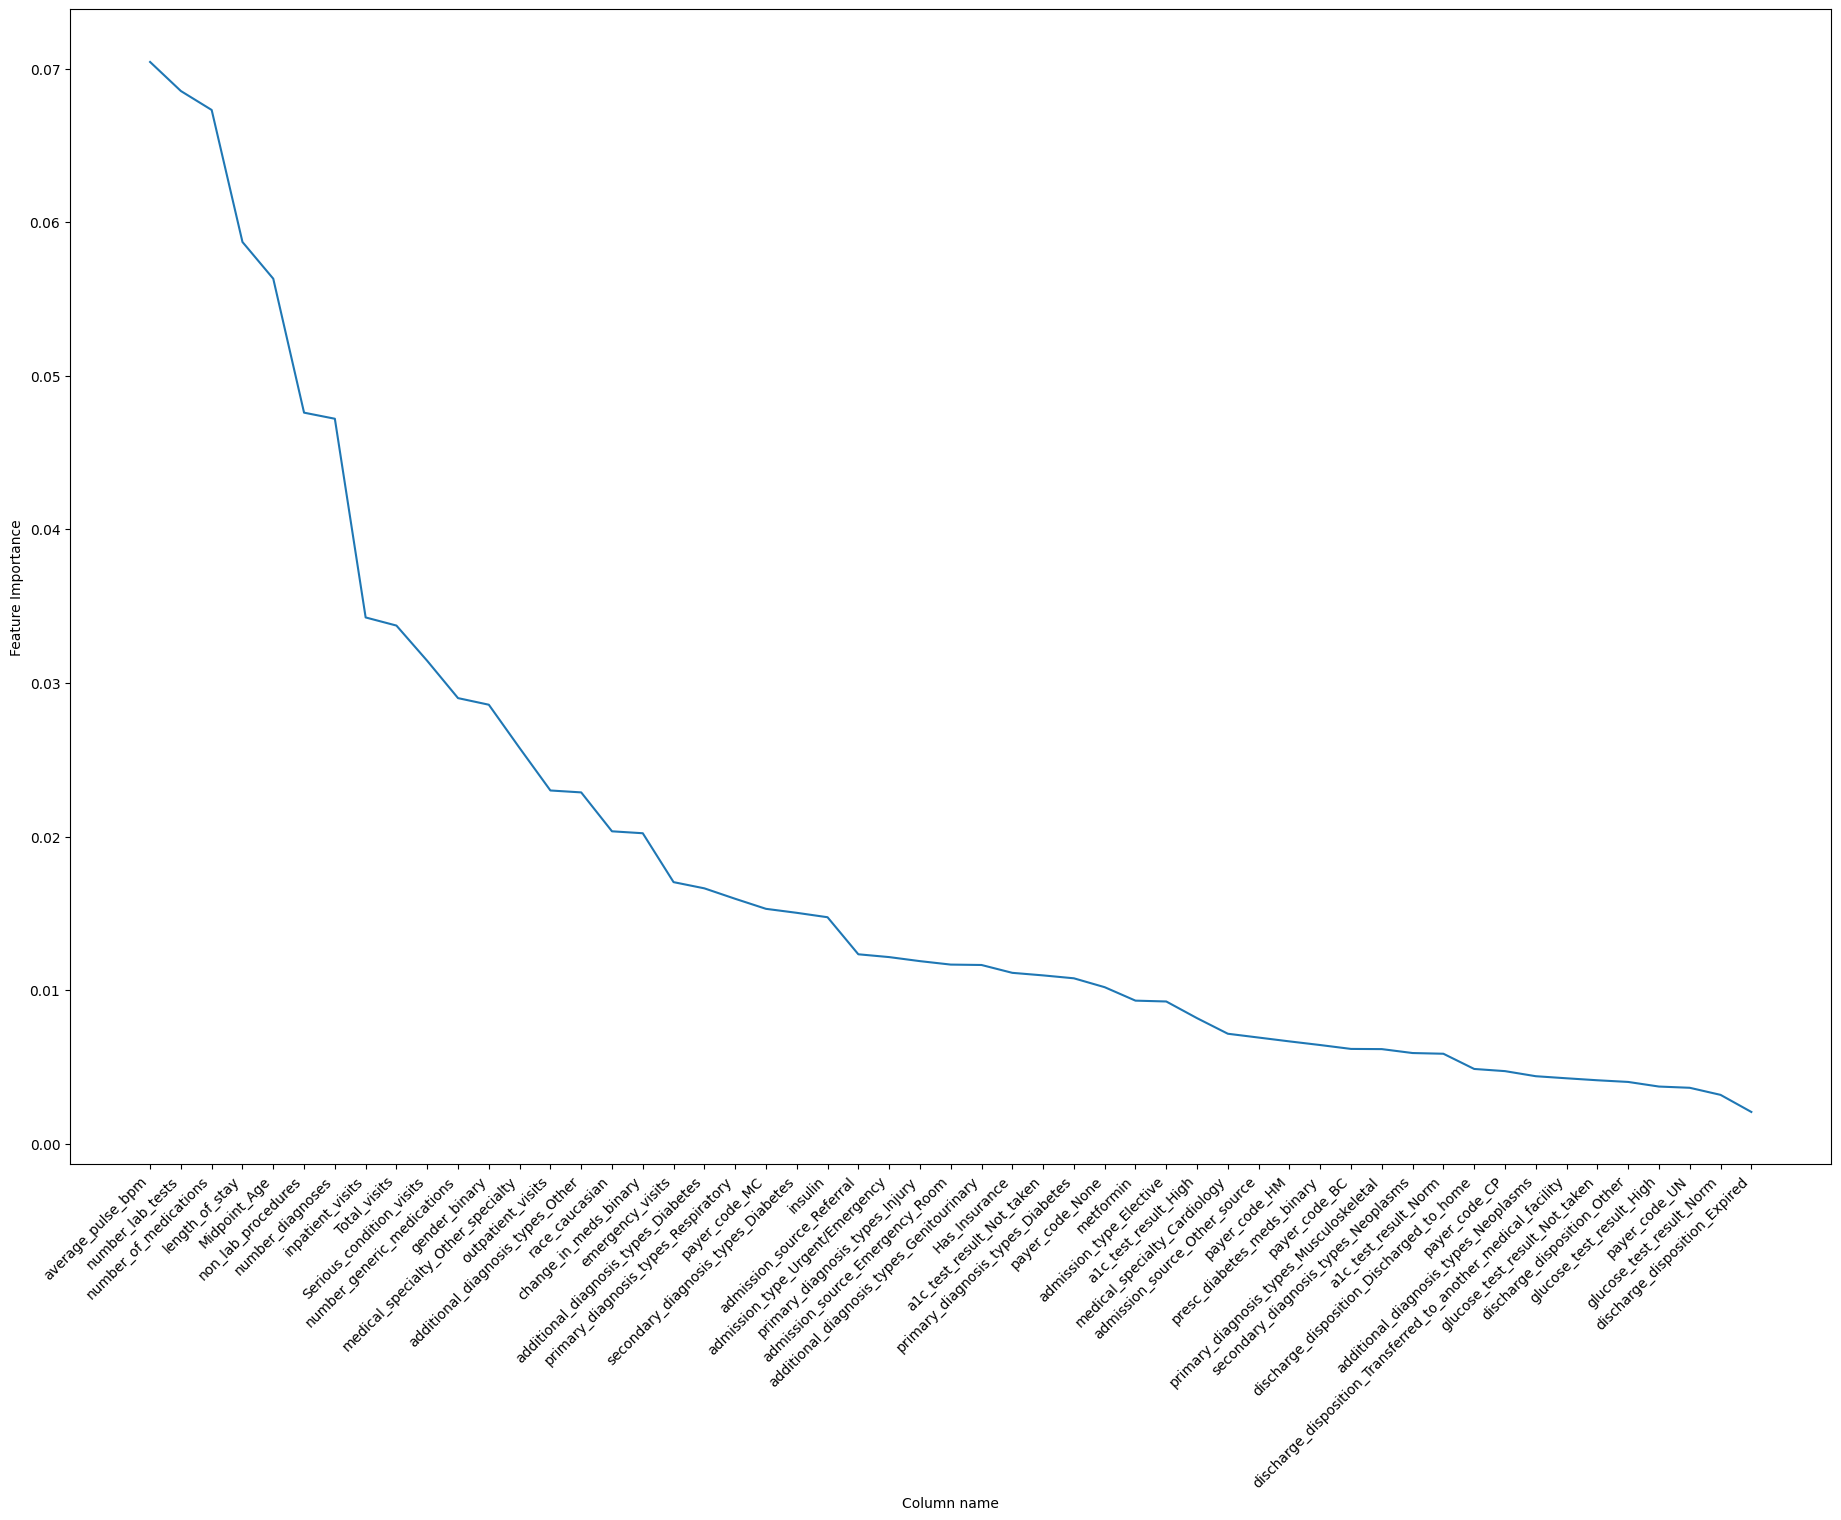

In [56]:
fig = plt.figure(figsize=(50, 15))
plt.subplot(122)
sns.lineplot(feature_importance_df, x='Column name', y="Feature Importance")
plt.xticks(rotation=45, ha="right")
plt.show()

In [57]:
feature_importance_df.to_csv('feature_importance_extra_trees2.csv')

### Lasso Regression (Embedded Methods)

In [36]:
metric_X_train_min_max_before = min_max_before.fit_transform(X_train_binary_2[metric_features])
metric_X_val_min_max_before = min_max_before.transform(X_val_binary_2[metric_features])

In [37]:
metric_X_train_min_max_before.shape

(53424, 13)

In [38]:
metric_X_val_min_max_before.shape

(17809, 13)

In [39]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [40]:
reg = LassoCV()
reg.fit(metric_X_train_min_max_before, y_train_binary_2)

LassoCV()

In [41]:
coef = pd.Series(reg.coef_, index = X_train_binary_2[metric_features].columns)
coef

average_pulse_bpm             0.002647
length_of_stay                0.026934
number_lab_tests             -0.008500
non_lab_procedures           -0.016745
number_of_medications         0.048994
number_diagnoses              0.057429
number_generic_medications    0.001056
outpatient_visits            -0.052667
emergency_visits              0.000000
inpatient_visits              0.637773
Midpoint_Age                  0.029625
Total_visits                  0.000000
Serious_condition_visits      0.558766
dtype: float64

In [42]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 2 variables


In [43]:
coef.sort_values()

outpatient_visits            -0.052667
non_lab_procedures           -0.016745
number_lab_tests             -0.008500
emergency_visits              0.000000
Total_visits                  0.000000
number_generic_medications    0.001056
average_pulse_bpm             0.002647
length_of_stay                0.026934
Midpoint_Age                  0.029625
number_of_medications         0.048994
number_diagnoses              0.057429
Serious_condition_visits      0.558766
inpatient_visits              0.637773
dtype: float64

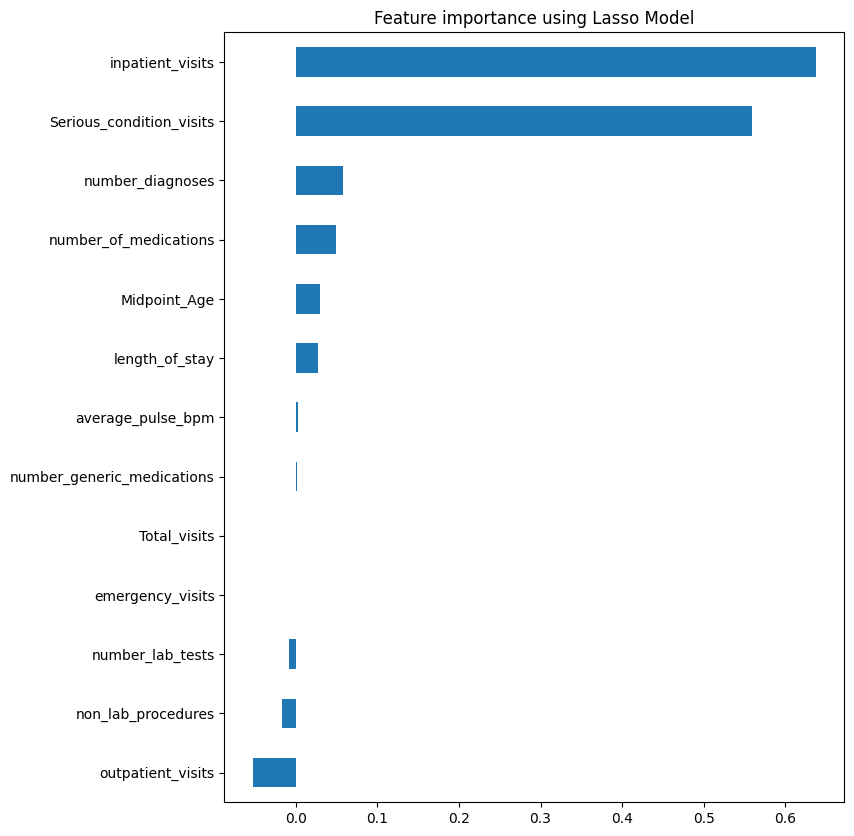

In [44]:
plot_importance(coef,'Lasso')

### Analysis of Variance for Categorical Variables, or ANOVA-C

In [45]:
non_metric_X_train = X_train_binary_2.drop(['outpatient_visits','emergency_visits','inpatient_visits','average_pulse_bpm',
 'length_of_stay','number_lab_tests','non_lab_procedures','number_of_medications','number_diagnoses',
 'number_generic_medications','Midpoint_Age'], axis=1)

In [46]:
non_metric_X_train.shape

(53424, 42)

In [47]:
# Instantiate a SelectKBest object
selector = SelectKBest(score_func=chi2, k=15)  # select 15 features

# Fit the selector to the training data
selector.fit(non_metric_X_train, y_train_binary_2)

# Transform the training and testing data
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected features
selected_features = non_metric_X_train.columns[selector.get_support()]
selected_features

Index(['payer_code_UN', 'medical_specialty_Cardiology',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'primary_diagnosis_types_Diabetes',
       'primary_diagnosis_types_Respiratory',
       'secondary_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Genitourinary',
       'additional_diagnosis_types_Neoplasms', 'insulin', 'metformin',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [48]:
# Instantiate a SelectKBest object
selector2 = SelectKBest(score_func=f_classif, k=9)  # select 9 numerical features

# Fit the selector to the training data
selector2.fit(X_train_binary_2[metric_features], y_train_binary_2)
print(X_train_binary_2[metric_features].shape)

# Transform the training and testing data
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected features
selected_features2 = X_train_binary_2[metric_features].columns[selector2.get_support()]
selected_features2

(53424, 13)


Index(['length_of_stay', 'number_lab_tests', 'number_of_medications',
       'number_diagnoses', 'emergency_visits', 'inpatient_visits',
       'Midpoint_Age', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [49]:
# Instantiate a SelectKBest object
selector3 = SelectKBest(score_func=mutual_info_classif, k=20)  # select 20 features

# Fit the selector to the training data
selector3.fit(X_train_binary_2, y_train_binary_2)

# Transform the training and testing data
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected features
selected_features3 = X_train_binary_2.columns[selector3.get_support()]
selected_features3

Index(['payer_code_MC', 'payer_code_None', 'admission_type_Urgent/Emergency',
       'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'admission_source_Emergency_Room',
       'admission_source_Referral', 'glucose_test_result_Not_taken',
       'a1c_test_result_Not_taken', 'inpatient_visits', 'number_diagnoses',
       'race_caucasian', 'insulin', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [50]:
# Instantiate a SelectKBest object
selector4 = SelectKBest(score_func=mutual_info_classif, k=15)  # select 15 features

# Fit the selector to the training data
selector4.fit(X_train_binary_2, y_train_binary_2)

# Transform the training and testing data
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected features
selected_features4 = X_train_binary_2.columns[selector4.get_support()]
selected_features4

Index(['admission_type_Urgent/Emergency', 'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'admission_source_Emergency_Room', 'glucose_test_result_Not_taken',
       'a1c_test_result_Not_taken', 'inpatient_visits', 'number_diagnoses',
       'race_caucasian', 'insulin', 'presc_diabetes_meds_binary',
       'change_in_meds_binary', 'Has_Insurance', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [60]:
# Instantiate a SelectKBest object
selector5 = SelectKBest(score_func=mutual_info_classif, k=12)  # select 12 features

# Fit the selector to the training data
selector5.fit(X_train_binary_2, y_train_binary_2)

# Transform the training and testing data
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected features
selected_features5 = X_train_binary_2.columns[selector5.get_support()]
selected_features5

Index(['admission_type_Urgent/Emergency', 'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'glucose_test_result_Not_taken', 'a1c_test_result_Not_taken',
       'inpatient_visits', 'race_caucasian', 'insulin',
       'presc_diabetes_meds_binary', 'Has_Insurance', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [61]:
# Instantiate a SelectKBest object
selector6 = SelectKBest(score_func=mutual_info_classif, k=10)  # select 10 features

# Fit the selector to the training data
selector6.fit(X_train_binary_2, y_train_binary_2)

# Transform the training and testing data
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected features
selected_features6 = X_train_binary_2.columns[selector6.get_support()]
selected_features6

Index(['discharge_disposition_Discharged_to_home',
       'glucose_test_result_Not_taken', 'a1c_test_result_Not_taken',
       'inpatient_visits', 'race_caucasian', 'insulin',
       'presc_diabetes_meds_binary', 'Has_Insurance', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

### Phik Correlation Matrix (Correlation between categorical variables)

interval columns not set, guessing: ['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC', 'payer_code_None', 'payer_code_UN', 'admission_type_Elective', 'admission_type_Urgent/Emergency', 'medical_specialty_Cardiology', 'medical_specialty_Other_specialty', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'admission_source_Emergency_Room', 'admission_source_Other_source', 'admission_source_Referral', 'primary_diagnosis_types_Diabetes', 'primary_diagnosis_types_Injury', 'primary_diagnosis_types_Musculoskeletal', 'primary_diagnosis_types_Respiratory', 'secondary_diagnosis_types_Diabetes', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Diabetes', 'additional_diagnosis_types_Genitourinary', 'additional_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Other', 'glucose_test_result_High', 'glucose_test_result_Norm', 'glucose_test_

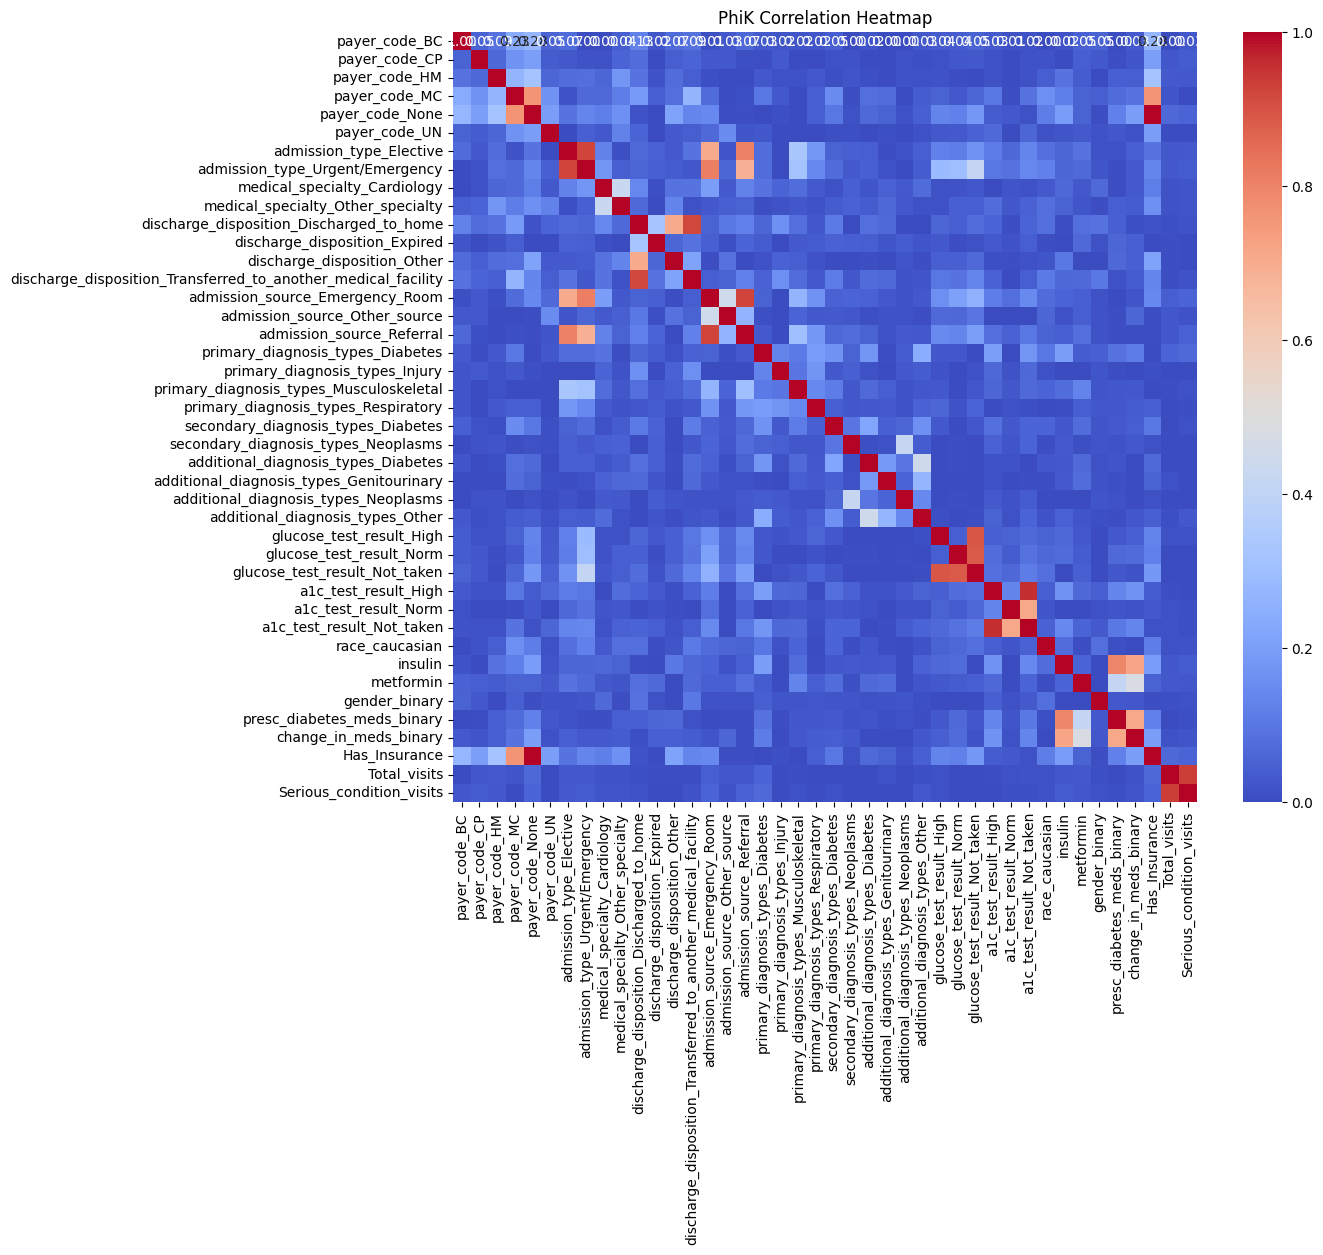

In [51]:
phik_corr_matrix = non_metric_X_train.phik_matrix()

# Plotting a heatmap for the PhiK correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PhiK Correlation Heatmap')
plt.show()

In [52]:
pd.set_option('display.max_columns', None)
phik_corr_matrix[phik_corr_matrix>0.5]

,payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_None,payer_code_UN,admission_type_Elective,admission_type_Urgent/Emergency,medical_specialty_Cardiology,medical_specialty_Other_specialty,discharge_disposition_Discharged_to_home,discharge_disposition_Expired,discharge_disposition_Other,discharge_disposition_Transferred_to_another_medical_facility,admission_source_Emergency_Room,admission_source_Other_source,admission_source_Referral,primary_diagnosis_types_Diabetes,primary_diagnosis_types_Injury,primary_diagnosis_types_Musculoskeletal,primary_diagnosis_types_Respiratory,secondary_diagnosis_types_Diabetes,secondary_diagnosis_types_Neoplasms,additional_diagnosis_types_Diabetes,additional_diagnosis_types_Genitourinary,additional_diagnosis_types_Neoplasms,additional_diagnosis_types_Other,glucose_test_result_High,glucose_test_result_Norm,glucose_test_result_Not_taken,a1c_test_result_High,a1c_test_result_Norm,a1c_test_result_Not_taken,race_caucasian,insulin,metformin,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
payer_code_BC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code_CP,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code_HM,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code_MC,NaN,NaN,NaN,1.000000,0.763858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.763858,NaN,NaN
payer_code_None,NaN,NaN,NaN,0.763858,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
payer_code_UN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_Elective,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.924796,NaN,NaN,NaN,NaN,NaN,NaN,0.703184,NaN,0.807047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_Urgent/Emergency,NaN,NaN,NaN,NaN,NaN,NaN,0.924796,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.809859,NaN,0.689362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty_Cardiology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty_Other_specialty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| RFE RF | Lasso | Mutual Info | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- | --- | --- | --- |
| Outpatient_visits | Keep | Discard | Keep | Keep | Discard | Try with and without |
| Emergency_visits | Keep | Keep | Keep | Keep| Discard | Include in the model |
| Inpatient_visits | Keep| Keep | Keep | Keep | Keep | Include in the model |
| Average_pulse_bpm | Keep | Discard | Keep | Keep? | Discard | Discard |
| Length_of_stay | Keep | Discard | Keep | Keep | Keep | Include in the model |
| Number_lab_tests | Keep | Discard | Keep | Keep | Discard | Try with and without |
| Non_lab_procedures | Keep | Discard |Keep | Keep | Discard | Try with and without |
| Number_of_medications | Keep | Keep |Keep | Keep | Keep | Include in the model |
| Number_diagnoses | Keep | Keep |Keep | Keep | Keep | Include in the model |
| Number_generic_medications | Keep | Keep | Keep | Keep? | Keep | Include in the model |
| Midpoint_Age | Keep | Keep |Keep | Keep | Keep | Include in the model |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| First Name| Discard|
| Last Name| Discard|
| Sex | Keep | 
| Ticket | Discard | 
| Title | Keep |
| Embarked Flag | Discard | 

<hr>

## Final result (Features choosen)

In [63]:
# selected_features=['race_Other','Midpoint_Age','discharge_disposition_Expired','discharge_disposition_Other',
#                    'discharge_disposition_Transferred_to_another_medical_facility','medical_specialty_Cardiology',
#                    'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification',
#                    'primary_diagnosis_types_Injury_and_poisoning','secondary_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders',
#                    'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification',
#                    'additional_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders',
#                    'additional_diagnosis_types_Diseases_of_the_genitourinary_system','glucose_test_result_>300',
#                    'a1c_test_result_None','diabetes_meds_binary','change_in_meds_binary','length_of_stay','non_lab_procedures',
#                    'number_of_medications','number_diagnoses','emergency_visits','inpatient_visits','discharge_disposition_Discharged_to_home']

In [64]:
# len(selected_features)

23

In [69]:
X_train_binary_2.columns

Index(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
       'payer_code_None', 'payer_code_UN', 'admission_type_Elective',
       'admission_type_Urgent/Emergency', 'medical_specialty_Cardiology',
       'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'admission_source_Emergency_Room', 'admission_source_Other_source',
       'admission_source_Referral', 'primary_diagnosis_types_Diabetes',
       'primary_diagnosis_types_Injury',
       'primary_diagnosis_types_Musculoskeletal',
       'primary_diagnosis_types_Respiratory',
       'secondary_diagnosis_types_Diabetes',
       'secondary_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Diabetes',
       'additional_diagnosis_types_Genitourinary',
       'additional_diagnosis_types_Neoplasms',
       'additional_diagn

In [70]:
selected_features=['emergency_visits','inpatient_visits','outpatient_visits','discharge_disposition_Discharged_to_home',
                   'length_of_stay', 'non_lab_procedures', 'number_lab_tests', 'number_of_medications', 'number_diagnoses',
                  'number_generic_medications', 'Midpoint_Age', 'discharge_disposition_Expired', 'medical_specialty_Cardiology',
                  'primary_diagnosis_types_Diabetes', 'insulin', 'a1c_test_result_Not_taken', 'secondary_diagnosis_types_Neoplasms']

In [66]:
len(selected_features)

17

# Normalization Methods

In [71]:
X_train_binary_2 = X_train_binary_2[selected_features]
X_val_binary_2 = X_val_binary_2[selected_features]
# test_binary_2 = test_binary_2[selected_features]

In [18]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_binary_1)
X_val_scaled = scaler.transform(X_val_binary_1)

In [72]:
# Min Max Scaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_binary_2)
X_val_minmax = min_max_scaler.transform(X_val_binary_2)
# test_minmax = min_max_scaler.transform(test_binary_2)

In [20]:
# Min Max Scaler between -1 and 1
min_max_scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))
X_train_minmax_neg1_1 = min_max_scaler_neg1_1.fit_transform(X_train_binary_1)
X_val_minmax_neg1_1 = min_max_scaler_neg1_1.transform(X_val_binary_1)

In [21]:
# Robust Scaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train_binary_1)
X_val_robust = robust_scaler.transform(X_val_binary_1)

# Testing Imbalanced Learning Methods

In [135]:
def evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2):
    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['Model', 'F1 Score', 'Time'])

    for model_name, model in models:
        steps = [(imbalance_method.__class__.__name__, imbalance_method), (model_name, model)]
        pipeline = ImbPipeline(steps=steps)
        cv = StratifiedKFold()

        # Start the timer
        start_time = time.time()

        scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
        score = np.mean(scores)

        # Stop the timer and calculate the elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time

        print('F1 Score: %.3f' % score)
        print('Time: %.2f seconds' % elapsed_time)

        # Append the model name, score, and time to the results DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'F1 Score': [score], 'Time': [elapsed_time]})], ignore_index=True)

    return results

In [85]:
models = [
    ('gau', GaussianNB()),
    ('lr', LogisticRegression(random_state=19)),
    ('dt', DecisionTreeClassifier(random_state=19)),
    ('knn', KNeighborsClassifier()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19)),
    ('svc', SVC(random_state=19)),
    ('rf', RandomForestClassifier(random_state=19)),
    ('gbc', GradientBoostingClassifier(subsample=0.5, random_state=19))    
]

In [ ]:
# Using RandomUnderSampler
imbalance_method = RandomUnderSampler(random_state=19)
results_RandomUnderSampler = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [88]:
results_RandomUnderSampler

,Model,F1 Score,Time
0,gau,0.203729,0.122684
1,lr,0.264416,0.422287
2,dt,0.211113,0.420452
3,knn,0.216751,0.935227
4,mlp,0.263614,24.894552
5,svc,0.260491,53.201982
6,rf,0.248210,10.053624
7,gbc,0.265460,3.556464


In [87]:
results_RandomUnderSampler.to_csv('results_RandomUnderSampler.csv')

In [ ]:
# Using SMOTE
imbalance_method = SMOTE(random_state=19)
results_Smote = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [90]:
results_Smote

,Model,F1 Score,Time
0,gau,0.203475,0.602184
1,lr,0.262963,2.590961
2,dt,0.154211,3.504869
3,knn,0.207243,6.748509
4,mlp,0.258950,369.226959
5,svc,0.262821,1330.919461
6,rf,0.054839,88.002949
7,gbc,0.094869,62.992306


In [91]:
results_Smote.to_csv('results_Smote.csv')

In [ ]:
# Using RandomOverSampler
imbalance_method = RandomOverSampler(random_state=19)
results_RandomOverSampler = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [95]:
results_RandomOverSampler

,Model,F1 Score,Time
0,gau,0.203646,0.291117
1,lr,0.265264,2.166903
2,dt,0.150749,1.956968
3,knn,0.202657,6.630564
4,mlp,0.262224,124.642613
5,svc,0.262719,1402.938566
6,rf,0.061284,46.371867
7,gbc,0.265483,25.361750


In [96]:
results_RandomOverSampler.to_csv('results_RandomOverSampler.csv')

In [ ]:
# Using ADASYN
imbalance_method = ADASYN(random_state=19)
results_Adasyn = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [98]:
results_Adasyn

,Model,F1 Score,Time
0,gau,0.203383,2.298271
1,lr,0.261456,4.179191
2,dt,0.160514,5.110312
3,knn,0.207131,8.530415
4,mlp,0.257635,345.873306
5,svc,0.262598,1309.208824
6,rf,0.050237,85.358880
7,gbc,0.077728,61.217526


In [99]:
results_Adasyn.to_csv('results_Adasyn.csv')

In [ ]:
# Using NearMiss 1
imbalance_method = NearMiss(version=1)
results_nearmiss1 = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

In [103]:
results_nearmiss1

,Model,F1 Score,Time
0,gau,0.191273,1.276375
1,lr,0.203369,1.625528
2,dt,0.199892,1.491422
3,knn,0.197528,1.941483
4,mlp,0.204075,42.299061
5,svc,0.201750,29.840470
6,rf,0.203163,9.017541
7,gbc,0.203478,4.559503


In [104]:
results_nearmiss1.to_csv('results_nearmiss1.csv')

In [106]:
# Using NearMiss 2
imbalance_method = NearMiss(version=2)
results_nearmiss2 = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.168
Time: 19.17 seconds
F1 Score: 0.192
Time: 19.51 seconds
F1 Score: 0.194
Time: 18.55 seconds
F1 Score: 0.192
Time: 19.05 seconds
F1 Score: 0.194
Time: 55.51 seconds
F1 Score: 0.192
Time: 38.41 seconds
F1 Score: 0.193
Time: 24.79 seconds
F1 Score: 0.193
Time: 21.50 seconds


In [107]:
results_nearmiss2

,Model,F1 Score,Time
0,gau,0.167741,19.171536
1,lr,0.191674,19.511422
2,dt,0.193535,18.545423
3,knn,0.191624,19.045506
4,mlp,0.193917,55.512751
5,svc,0.192471,38.411235
6,rf,0.193021,24.791069
7,gbc,0.193106,21.497524


In [108]:
results_nearmiss2.to_csv('results_nearmiss2.csv')

In [109]:
# Using NearMiss 3
imbalance_method = NearMiss(version=3)
results_nearmiss3 = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.198
Time: 2.04 seconds
F1 Score: 0.195
Time: 2.23 seconds
F1 Score: 0.191
Time: 2.29 seconds
F1 Score: 0.192
Time: 2.61 seconds
F1 Score: 0.199
Time: 29.78 seconds
F1 Score: 0.191
Time: 47.04 seconds
F1 Score: 0.199
Time: 11.41 seconds
F1 Score: 0.201
Time: 5.49 seconds


In [110]:
results_nearmiss3

,Model,F1 Score,Time
0,gau,0.197784,2.042212
1,lr,0.194866,2.227928
2,dt,0.190782,2.293071
3,knn,0.192124,2.608993
4,mlp,0.198831,29.778420
5,svc,0.191436,47.037407
6,rf,0.199191,11.414696
7,gbc,0.200512,5.488959


In [111]:
results_nearmiss3.to_csv('results_nearmiss3.csv')

In [112]:
# Using Tomek Links
imbalance_method = TomekLinks()
results_tomeklinks = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 7.81 seconds
F1 Score: 0.028
Time: 8.93 seconds
F1 Score: 0.160
Time: 9.36 seconds
F1 Score: 0.072
Time: 11.69 seconds
F1 Score: 0.021
Time: 48.48 seconds
F1 Score: 0.000
Time: 573.87 seconds
F1 Score: 0.027
Time: 36.54 seconds
F1 Score: 0.027
Time: 20.66 seconds


In [113]:
results_tomeklinks

,Model,F1 Score,Time
0,gau,0.203706,7.805324
1,lr,0.027905,8.933269
2,dt,0.159943,9.357019
3,knn,0.071834,11.691424
4,mlp,0.020728,48.477707
5,svc,0.000000,573.867851
6,rf,0.027025,36.539320
7,gbc,0.026768,20.658265


In [114]:
results_tomeklinks.to_csv('results_tomeklinks.csv')

In [116]:
# Using EditedNearestNeighbours with Majority
imbalance_method = EditedNearestNeighbours(kind_sel='mode')
results_EditedNearestNeighbours_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 16.58 seconds
F1 Score: 0.032
Time: 17.50 seconds
F1 Score: 0.167
Time: 17.71 seconds
F1 Score: 0.078
Time: 20.07 seconds
F1 Score: 0.035
Time: 53.28 seconds
F1 Score: 0.000
Time: 632.50 seconds
F1 Score: 0.042
Time: 44.87 seconds
F1 Score: 0.034
Time: 29.01 seconds


In [117]:
results_EditedNearestNeighbours_majority

,Model,F1 Score,Time
0,gau,0.203654,16.583304
1,lr,0.032206,17.498999
2,dt,0.167055,17.709221
3,knn,0.078401,20.066185
4,mlp,0.034647,53.277503
5,svc,0.000000,632.499250
6,rf,0.041871,44.872832
7,gbc,0.033870,29.012435


In [118]:
results_EditedNearestNeighbours_majority.to_csv('results_EditedNearestNeighbours_majority.csv')

In [119]:
# Using EditedNearestNeighbours with All
imbalance_method = EditedNearestNeighbours(kind_sel='all')
results_EditedNearestNeighbours_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 7.14 seconds
F1 Score: 0.084
Time: 7.95 seconds
F1 Score: 0.191
Time: 7.88 seconds
F1 Score: 0.147
Time: 10.06 seconds
F1 Score: 0.092
Time: 56.89 seconds
F1 Score: 0.007
Time: 261.57 seconds
F1 Score: 0.106
Time: 30.36 seconds
F1 Score: 0.097
Time: 17.12 seconds


In [120]:
results_EditedNearestNeighbours_all

,Model,F1 Score,Time
0,gau,0.203668,7.135063
1,lr,0.084001,7.952037
2,dt,0.190894,7.884449
3,knn,0.147196,10.059474
4,mlp,0.092035,56.893388
5,svc,0.007334,261.573524
6,rf,0.106244,30.355045
7,gbc,0.096634,17.122725


In [121]:
results_EditedNearestNeighbours_all.to_csv('results_EditedNearestNeighbours_all.csv')

In [122]:
# Using RepeatedEditedNearestNeighbours with Majority
imbalance_method = RepeatedEditedNearestNeighbours(kind_sel='mode')
results_RepeatedEditedNearestNeighbours_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 98.09 seconds
F1 Score: 0.038
Time: 99.72 seconds
F1 Score: 0.162
Time: 99.05 seconds
F1 Score: 0.085
Time: 101.33 seconds
F1 Score: 0.045
Time: 138.64 seconds
F1 Score: 0.000
Time: 687.81 seconds
F1 Score: 0.045
Time: 126.62 seconds
F1 Score: 0.038
Time: 110.94 seconds


In [123]:
results_RepeatedEditedNearestNeighbours_majority

,Model,F1 Score,Time
0,gau,0.203647,98.091736
1,lr,0.038082,99.715766
2,dt,0.162402,99.045186
3,knn,0.085431,101.328923
4,mlp,0.045182,138.644982
5,svc,0.000000,687.809563
6,rf,0.044683,126.620183
7,gbc,0.037736,110.938931


In [124]:
results_RepeatedEditedNearestNeighbours_majority.to_csv('results_RepeatedEditedNearestNeighbours_majority.csv')

In [125]:
# Using RepeatedEditedNearestNeighbours with All
imbalance_method = RepeatedEditedNearestNeighbours(kind_sel='all')
results_RepeatedEditedNearestNeighbours_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 41.26 seconds
F1 Score: 0.145
Time: 41.32 seconds
F1 Score: 0.207
Time: 41.14 seconds
F1 Score: 0.187
Time: 43.08 seconds
F1 Score: 0.160
Time: 101.79 seconds
F1 Score: 0.057
Time: 170.29 seconds
F1 Score: 0.185
Time: 60.02 seconds
F1 Score: 0.156
Time: 48.96 seconds


In [126]:
results_RepeatedEditedNearestNeighbours_all

,Model,F1 Score,Time
0,gau,0.204242,41.256845
1,lr,0.145073,41.315871
2,dt,0.207042,41.140385
3,knn,0.186714,43.082337
4,mlp,0.160061,101.794310
5,svc,0.056816,170.290198
6,rf,0.185440,60.022063
7,gbc,0.155886,48.963447


In [127]:
results_RepeatedEditedNearestNeighbours_all.to_csv('results_RepeatedEditedNearestNeighbours_all.csv')

In [128]:
# Using AllKNN with Majority
imbalance_method = AllKNN(kind_sel='mode')
results_AllKNN_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 44.24 seconds
F1 Score: 0.054
Time: 44.55 seconds
F1 Score: 0.172
Time: 44.71 seconds
F1 Score: 0.108
Time: 47.39 seconds
F1 Score: 0.059
Time: 96.42 seconds
F1 Score: 0.000
Time: 466.90 seconds
F1 Score: 0.066
Time: 70.55 seconds
F1 Score: 0.053
Time: 55.50 seconds


In [129]:
results_AllKNN_majority

,Model,F1 Score,Time
0,gau,0.203653,44.236460
1,lr,0.053581,44.552834
2,dt,0.171603,44.710514
3,knn,0.108195,47.391541
4,mlp,0.058954,96.418337
5,svc,0.000335,466.896959
6,rf,0.065598,70.547451
7,gbc,0.052653,55.499592


In [130]:
results_AllKNN_majority.to_csv('results_AllKNN_majority.csv')

In [131]:
# Using AllKNN with All
imbalance_method = AllKNN(kind_sel='all')
results_AllKNN_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 17.48 seconds
F1 Score: 0.106
Time: 18.29 seconds
F1 Score: 0.195
Time: 18.21 seconds
F1 Score: 0.165
Time: 20.19 seconds
F1 Score: 0.124
Time: 75.20 seconds
F1 Score: 0.015
Time: 211.35 seconds
F1 Score: 0.140
Time: 39.60 seconds
F1 Score: 0.123
Time: 26.70 seconds


In [132]:
results_AllKNN_all

,Model,F1 Score,Time
0,gau,0.203801,17.484474
1,lr,0.106354,18.285569
2,dt,0.194668,18.209017
3,knn,0.164614,20.193073
4,mlp,0.123610,75.203058
5,svc,0.014541,211.351533
6,rf,0.140440,39.603948
7,gbc,0.122871,26.698530


In [133]:
results_AllKNN_all.to_csv('results_AllKNN_all.csv')

In [134]:
# # Using CondensedNearestNeighbour
# imbalance_method = CondensedNearestNeighbour(random_state=19)
# results_CondensedNearestNeighbour = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 20224.03 seconds


KeyboardInterrupt: 

Criticism for the Condensed Nearest Neighbor Rule is that examples are selected randomly especially initially which results in retention of unnecessary samples. Thus to address the issue the CNN is modified to Tomek Links- under-sampling techniques. Also it takes too long to run (20224 seconds only for GaussianNB() which is more than 5 hours and a half on the fastest model), so we are not going to test it now (maybe we can test it in the future in other way that decreases the duration time, like less models, no cross-validation, or doing the CondensedNearestNeighbour one time and then using that result for all the models.

In [ ]:
# results_CondensedNearestNeighbour

In [ ]:
# results_CondensedNearestNeighbour.to_csv('results_CondensedNearestNeighbour.csv')

In [148]:
# Using OneSidedSelection
imbalance_method = OneSidedSelection(random_state=19)
results_OneSidedSelection = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 11.66 seconds
F1 Score: 0.028
Time: 12.25 seconds
F1 Score: 0.160
Time: 11.96 seconds
F1 Score: 0.072
Time: 14.52 seconds
F1 Score: 0.023
Time: 28.31 seconds
F1 Score: 0.000
Time: 153.75 seconds
F1 Score: 0.029
Time: 18.31 seconds
F1 Score: 0.026
Time: 15.30 seconds


In [149]:
results_OneSidedSelection

,Model,F1 Score,Time
0,gau,0.203706,11.663980
1,lr,0.027905,12.251982
2,dt,0.159818,11.959967
3,knn,0.071834,14.515104
4,mlp,0.023242,28.308756
5,svc,0.000000,153.754509
6,rf,0.029485,18.313947
7,gbc,0.026104,15.301462


In [150]:
results_OneSidedSelection.to_csv('results_OneSidedSelection.csv')

In [142]:
# Using NeighbourhoodCleaningRule with Majority
imbalance_method = NeighbourhoodCleaningRule(kind_sel='mode')
results_NeighbourhoodCleaningRule_majority = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 13.93 seconds
F1 Score: 0.063
Time: 14.32 seconds
F1 Score: 0.177
Time: 13.31 seconds
F1 Score: 0.143
Time: 15.00 seconds
F1 Score: 0.069
Time: 28.27 seconds
F1 Score: 0.001
Time: 91.93 seconds
F1 Score: 0.087
Time: 18.01 seconds
F1 Score: 0.070
Time: 15.30 seconds


In [143]:
results_NeighbourhoodCleaningRule_majority

,Model,F1 Score,Time
0,gau,0.203735,13.934167
1,lr,0.062784,14.318670
2,dt,0.176801,13.306470
3,knn,0.142716,14.998307
4,mlp,0.069496,28.269780
5,svc,0.001005,91.932815
6,rf,0.087238,18.012717
7,gbc,0.070396,15.297329


In [144]:
results_NeighbourhoodCleaningRule_majority.to_csv('results_NeighbourhoodCleaningRule_majority.csv')

In [145]:
# Using NeighbourhoodCleaningRule with All
imbalance_method = NeighbourhoodCleaningRule(kind_sel='all')
results_NeighbourhoodCleaningRule_all = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 12.91 seconds
F1 Score: 0.064
Time: 12.83 seconds
F1 Score: 0.181
Time: 12.92 seconds
F1 Score: 0.145
Time: 14.68 seconds
F1 Score: 0.068
Time: 29.87 seconds
F1 Score: 0.002
Time: 92.59 seconds
F1 Score: 0.094
Time: 18.18 seconds
F1 Score: 0.071
Time: 15.47 seconds


In [146]:
results_NeighbourhoodCleaningRule_all

,Model,F1 Score,Time
0,gau,0.203732,12.905717
1,lr,0.063891,12.828699
2,dt,0.180582,12.918865
3,knn,0.145314,14.681703
4,mlp,0.067746,29.869842
5,svc,0.001674,92.594493
6,rf,0.093739,18.178955
7,gbc,0.071109,15.465496


In [147]:
results_NeighbourhoodCleaningRule_all.to_csv('results_NeighbourhoodCleaningRule_all.csv')

In [136]:
# Over-sampling using SMOTE and cleaning using ENN
imbalance_method = SMOTEENN(random_state=19)
results_SMOTEENN = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.204
Time: 35.94 seconds
F1 Score: 0.241
Time: 35.62 seconds
F1 Score: 0.189
Time: 36.43 seconds
F1 Score: 0.219
Time: 38.55 seconds
F1 Score: 0.249
Time: 98.40 seconds
F1 Score: 0.237
Time: 225.49 seconds
F1 Score: 0.191
Time: 49.47 seconds
F1 Score: 0.234
Time: 46.27 seconds


In [137]:
results_SMOTEENN

,Model,F1 Score,Time
0,gau,0.203636,35.942277
1,lr,0.240692,35.622710
2,dt,0.188742,36.428874
3,knn,0.218786,38.549656
4,mlp,0.249068,98.398691
5,svc,0.236759,225.489152
6,rf,0.190525,49.471224
7,gbc,0.233811,46.269017


In [138]:
results_SMOTEENN.to_csv('results_SMOTEENN.csv')

In [139]:
# Over-sampling using SMOTE and cleaning using ENN
imbalance_method = SMOTETomek(random_state=19)
results_SMOTETomek = evaluate_models(imbalance_method, models, X_train_minmax, y_train_binary_2)

F1 Score: 0.203
Time: 34.79 seconds
F1 Score: 0.263
Time: 35.74 seconds
F1 Score: 0.158
Time: 34.82 seconds
F1 Score: 0.208
Time: 38.63 seconds
F1 Score: 0.259
Time: 120.52 seconds
F1 Score: 0.263
Time: 426.16 seconds
F1 Score: 0.054
Time: 52.27 seconds
F1 Score: 0.095
Time: 47.93 seconds


In [140]:
results_SMOTETomek

,Model,F1 Score,Time
0,gau,0.203475,34.789883
1,lr,0.263119,35.735600
2,dt,0.158070,34.815757
3,knn,0.207557,38.630724
4,mlp,0.259306,120.518484
5,svc,0.262756,426.161914
6,rf,0.054424,52.273340
7,gbc,0.095073,47.926416


In [141]:
results_SMOTETomek.to_csv('results_SMOTETomek.csv')

In [155]:
dfs = ['results_RandomUnderSampler','results_Smote','results_RandomOverSampler','results_Adasyn','results_nearmiss1',
       'results_nearmiss2','results_nearmiss3','results_tomeklinks','results_EditedNearestNeighbours_majority',
       'results_EditedNearestNeighbours_all','results_RepeatedEditedNearestNeighbours_majority',
       'results_RepeatedEditedNearestNeighbours_all','results_AllKNN_majority','results_AllKNN_all','results_OneSidedSelection',
       'results_NeighbourhoodCleaningRule_majority','results_NeighbourhoodCleaningRule_all','results_SMOTEENN',
       'results_SMOTETomek']  

methods = ['RandomUnderSampler','Smote','RandomOverSampler','Adasyn','NearMiss1','NearMiss2','NearMiss3','TomekLinks',
          'EditedNearestNeighbours_Majority','EditedNearestNeighbours_All','RepeatedEditedNearestNeighbours_Majority',
          'RepeatedEditedNearestNeighbours_All','AllKNN_Majority','AllKNN_All','OneSidedSelection',
           'NeighbourhoodCleaningRule_Majority','NeighbourhoodCleaningRule_All','SMOTEENN','SMOTETomek']

# Convert dataframe names to actual dataframes
dfs = [globals()[df] for df in dfs]

# Add a new column to each dataframe with the corresponding method name
for df, method in zip(dfs, methods):
    df['Imbalanced_Method'] = method

# Concatenate all dataframes
result_all_imbalanced_methods = pd.concat(dfs)

In [159]:
# Get a list of all the columns
cols = list(result_all_imbalanced_methods.columns)

# Remove 'Method' from the list
cols.remove('Imbalanced_Method')

# Reorder the columns
result_all_imbalanced_methods = result_all_imbalanced_methods[['Imbalanced_Method'] + cols]

In [162]:
result_all_imbalanced_methods = result_all_imbalanced_methods.sort_values(by=['Model', 'F1 Score'], ascending=[True, False])

In [163]:
result_all_imbalanced_methods

,Imbalanced_Method,Model,F1 Score,Time
2,RandomUnderSampler,dt,0.211113,0.420452
2,RepeatedEditedNearestNeighbours_All,dt,0.207042,41.140385
2,NearMiss1,dt,0.199892,1.491422
2,AllKNN_All,dt,0.194668,18.209017
2,NearMiss2,dt,0.193535,18.545423
...,...,...,...,...
5,AllKNN_Majority,svc,0.000335,466.896959
5,TomekLinks,svc,0.000000,573.867851
5,EditedNearestNeighbours_Majority,svc,0.000000,632.499250
5,RepeatedEditedNearestNeighbours_Majority,svc,0.000000,687.809563


In [164]:
result_all_imbalanced_methods.to_csv('result_all_imbalanced_methods.csv')

# Random Undersampling

### GaussianNB

In [165]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [166]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [167]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [168]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [169]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [170]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


### Logistic Regression

In [295]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.052


In [296]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.093


In [297]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.141


In [298]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.188


In [299]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.220


In [300]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.240


In [301]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.254


In [302]:
model = LogisticRegression(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    0.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    0.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished


F1 Score: 0.265


### Decision Tree Classifier

In [193]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.175


In [186]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.190


In [187]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.197


In [188]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.200


In [189]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.203


In [190]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.205


In [191]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.208


In [294]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    0.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


F1 Score: 0.148


### KNeighbors Classifier

In [194]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.104


In [195]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.154


In [196]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.181


In [197]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.198


In [198]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.206


In [199]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.212


In [200]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.216


In [307]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.217


### MLP Classifier

In [208]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.046


In [209]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.094


In [210]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.157


In [211]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.211


In [212]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.240


In [213]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.257


In [303]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.75, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.261


In [214]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [269]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [270]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [271]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.95, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


In [273]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(8,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


### SVC

In [284]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.6, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    9.5s remaining:    6.3s


F1 Score: 0.171


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished


In [283]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.7, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.7s finished


F1 Score: 0.239


In [285]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.8, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.1s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.2s remaining:    5.4s


F1 Score: 0.257


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.8s finished


In [286]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.7s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.7s remaining:    5.1s


F1 Score: 0.259


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished


In [287]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', SVC(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.0s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


F1 Score: 0.259


In [268]:
model = SVC(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1, verbose=10)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min


F1 Score: 0.262


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


### Gradient Boosting Classifer

In [215]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.045


In [216]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.101


In [217]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.165


In [218]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.207


In [219]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.242


In [220]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.259


In [221]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.79, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [222]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.267


In [224]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.268


In [225]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.266


### Random Forest Classifier

In [226]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.060


In [227]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.124


In [228]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.181


In [229]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.217


In [230]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.237


In [231]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.245


In [232]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.248


In [233]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.250


In [234]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.250


In [292]:
model = RandomForestClassifier(class_weight='balanced', random_state=19)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.016


### ExtraTreesClassifier

In [235]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.081


In [236]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.143


In [237]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.186


In [238]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.215


In [239]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.230


In [240]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.239


In [241]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.243


In [242]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.243


In [243]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.242


In [293]:
model = ExtraTreesClassifier(class_weight='balanced', random_state=19, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(model, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.030


### Bagging Classifier

In [244]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.099


In [245]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.151


In [246]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.184


In [247]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.200


In [248]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.214


In [249]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.223


In [250]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.225


In [310]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.226


In [251]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.224


In [252]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.227


### AdaBoost Classifier

In [255]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.2, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.044


In [256]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.3, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.106


In [257]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.4, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.170


In [258]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.5, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.209


In [259]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.6, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.239


In [260]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.7, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.253


In [261]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.8, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.260


In [263]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


In [264]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.264


In [265]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.95, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.263


In [266]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', AdaBoostClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.262


# Imbalanced Learning

Cost-sensitive learning: This involves assigning a higher cost to misclassifying minority classes.

In [311]:
y_train_binary_2.value_counts(normalize=True)

readmitted_binary
0    0.888402
1    0.111598
Name: proportion, dtype: float64

In [312]:
y_val_binary_2.value_counts(normalize=True)

readmitted_binary
0    0.888371
1    0.111629
Name: proportion, dtype: float64

### Random Undersampling

We are going to use MinMaxScaler, because RobustScaler can only be a last resource option (said by the professor) and because we dont have normal or normalike distributions (also because we have binary features which dont have normal distributions).

In [318]:
print("Number transactions X_train dataset: ", X_train_binary_2.shape)
print("Number transactions y_train dataset: ", y_train_binary_2.shape)
print("Number transactions X_val dataset: ", X_val_binary_2.shape)
print("Number transactions y_val dataset: ", y_val_binary_2.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_binary_2==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_binary_2==0)))

rus = RandomUnderSampler(sampling_strategy=0.85, random_state=19)
X_train_res, y_train_res = rus.fit_resample(X_train_minmax, y_train_binary_2.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (53424, 17)
Number transactions y_train dataset:  (53424,)
Number transactions X_val dataset:  (17809, 17)
Number transactions y_val dataset:  (17809,)
Before OverSampling, counts of label '1': 5962
Before OverSampling, counts of label '0': 47462 

After OverSampling, the shape of train_X: (12976, 17)
After OverSampling, the shape of train_y: (12976,) 

After OverSampling, counts of label '1': 5962
After OverSampling, counts of label '0': 7014


In [ ]:
# def metrics(y_train, pred_train , y_val, pred_val):
#     print('___________________________________________________________________________________________________________')
#     print('                                                     TRAIN                                                 ')
#     print('-----------------------------------------------------------------------------------------------------------')
#     print(classification_report(y_train, pred_train))
#     print(confusion_matrix(y_train, pred_train))


#     print('___________________________________________________________________________________________________________')
#     print('                                                VALIDATION                                                 ')
#     print('-----------------------------------------------------------------------------------------------------------')
#     print(classification_report(y_val, pred_val))
#     print(confusion_matrix(y_val, pred_val))

# Algorithms

In [319]:
# Define the models
models = [
    ('dt', DecisionTreeClassifier(random_state=19)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'dt__criterion': ['gini', 'entropy'],
        'dt__splitter': ['best', 'random'],
        'dt__max_depth': [2,4,6,8,10,12,14,16,18,20],
        'dt__max_features': [2,4,6,8, None],
        'dt__min_samples_leaf': [5, 25, 50, 100, None]
    }, # Decision Tree
    {
        'knn__n_neighbors': [75, 150, 250, 300],
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['auto'],
    }, # K Nearest Neighbors
    {
        'rf__n_estimators': [10, 50, 75, 100],
        'rf__criterion': ['gini', 'entropy'],
        'rf__max_depth': [2, 5, 10],
        'rf__min_samples_split': [2, 10, 50, 100],
        'rf__min_samples_leaf': [1, 5, 10, 15]
    } # Random Forest
]


# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples_leaf=100, dt__splitter=best
[CV 1/5; 1/10] END dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples_leaf=100, dt__splitter=best;, score=0.257 total time=   0.0s
[CV 2/5; 1/10] START dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples_leaf=100, dt__splitter=best
[CV 2/5; 1/10] END dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples_leaf=100, dt__splitter=best;, score=0.250 total time=   0.0s
[CV 3/5; 1/10] START dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples_leaf=100, dt__splitter=best
[CV 3/5; 1/10] END dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples_leaf=100, dt__splitter=best;, score=0.252 total time=   0.0s
[CV 4/5; 1/10] START dt__criterion=entropy, dt__max_depth=8, dt__max_features=6, dt__min_samples

[CV 5/5; 8/10] END dt__criterion=entropy, dt__max_depth=18, dt__max_features=4, dt__min_samples_leaf=5, dt__splitter=random;, score=0.238 total time=   0.0s
[CV 1/5; 9/10] START dt__criterion=entropy, dt__max_depth=12, dt__max_features=4, dt__min_samples_leaf=25, dt__splitter=random
[CV 1/5; 9/10] END dt__criterion=entropy, dt__max_depth=12, dt__max_features=4, dt__min_samples_leaf=25, dt__splitter=random;, score=0.244 total time=   0.0s
[CV 2/5; 9/10] START dt__criterion=entropy, dt__max_depth=12, dt__max_features=4, dt__min_samples_leaf=25, dt__splitter=random
[CV 2/5; 9/10] END dt__criterion=entropy, dt__max_depth=12, dt__max_features=4, dt__min_samples_leaf=25, dt__splitter=random;, score=0.217 total time=   0.0s
[CV 3/5; 9/10] START dt__criterion=entropy, dt__max_depth=12, dt__max_features=4, dt__min_samples_leaf=25, dt__splitter=random
[CV 3/5; 9/10] END dt__criterion=entropy, dt__max_depth=12, dt__max_features=4, dt__min_samples_leaf=25, dt__splitter=random;, score=0.232 total t

[CV 2/5; 6/8] END knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance;, score=0.237 total time=   0.2s
[CV 3/5; 6/8] START knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance
[CV 3/5; 6/8] END knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance;, score=0.237 total time=   0.2s
[CV 4/5; 6/8] START knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance
[CV 4/5; 6/8] END knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance;, score=0.245 total time=   0.2s
[CV 5/5; 6/8] START knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance
[CV 5/5; 6/8] END knn__algorithm=auto, knn__n_neighbors=250, knn__weights=distance;, score=0.236 total time=   0.2s
[CV 1/5; 7/8] START knn__algorithm=auto, knn__n_neighbors=300, knn__weights=uniform
[CV 1/5; 7/8] END knn__algorithm=auto, knn__n_neighbors=300, knn__weights=uniform;, score=0.241 total time=   0.2s
[CV 2/5; 7/8] START knn__algorithm=auto, knn__n_neighbors=300, knn__weights=unifor

[CV 4/5; 4/10] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.237 total time=   0.1s
[CV 5/5; 4/10] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 5/5; 4/10] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.234 total time=   0.1s
[CV 1/5; 5/10] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=50, rf__n_estimators=75
[CV 1/5; 5/10] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=50, rf__n_estimators=75;, score=0.229 total time=   0.1s
[CV 2/5; 5/10] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=50, rf__n_estimators=75
[CV 2/5; 5/10] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=50, rf__n_estimators=75;, score=0

[CV 3/5; 10/10] END rf__criterion=entropy, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=100, rf__n_estimators=75;, score=0.236 total time=   0.1s
[CV 4/5; 10/10] START rf__criterion=entropy, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=100, rf__n_estimators=75
[CV 4/5; 10/10] END rf__criterion=entropy, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=100, rf__n_estimators=75;, score=0.239 total time=   0.1s
[CV 5/5; 10/10] START rf__criterion=entropy, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=100, rf__n_estimators=75
[CV 5/5; 10/10] END rf__criterion=entropy, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=100, rf__n_estimators=75;, score=0.236 total time=   0.1s


In [320]:
test_scores_df

,best_score,best_params
2,0.268766,"{'rf__n_estimators': 100, 'rf__min_samples_spl..."
0,0.248645,"{'dt__splitter': 'best', 'dt__min_samples_leaf..."
1,0.242688,"{'knn__weights': 'distance', 'knn__n_neighbors..."


In [321]:
print(test_scores_df['best_params'][2])
print(test_scores_df['best_params'][0])
print(test_scores_df['best_params'][1])

{'rf__n_estimators': 100, 'rf__min_samples_split': 100, 'rf__min_samples_leaf': 5, 'rf__max_depth': 10, 'rf__criterion': 'gini'}
{'dt__splitter': 'best', 'dt__min_samples_leaf': 100, 'dt__max_features': 6, 'dt__max_depth': 8, 'dt__criterion': 'entropy'}
{'knn__weights': 'distance', 'knn__n_neighbors': 150, 'knn__algorithm': 'auto'}


In [322]:
test_scores_df.to_csv('test_scores_df_minmax_1.csv', index = False, encoding='utf-8')

In [134]:
# Define the models
models = [
    ('dt', DecisionTreeClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'dt__criterion': ['gini','entropy'],
        'dt__splitter': ['random','best'],
        'dt__max_depth': [5, 10, 15, 20],
        'dt__min_samples_split': [50, 100, 150, 225, 300, 400],
        'dt__min_samples_leaf': [5, 25,50,100]
    } # Decision Tree
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 1/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.201 total time=   0.0s
[CV 2/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 2/5; 1/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 3/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 1/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.210 total time=   0.0s
[CV 4/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_sa

[CV 4/5; 6/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 6/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 6/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 7/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 7/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.201 total time=   0.0s
[CV 2/5; 7/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 7/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, sco

[CV 3/5; 12/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 12/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 12/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 12/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 5/5; 12/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 13/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 13/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random;, 

[CV 2/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 18/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 18/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 18/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best

[CV 1/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.245 total time=   0.2s
[CV 2/5; 24/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 24/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 3/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 24/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best

[CV 1/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.245 total time=   0.2s
[CV 2/5; 30/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 30/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 30/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best

[CV 4/5; 35/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.194 total time=   0.0s
[CV 5/5; 35/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 35/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 1/5; 36/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 36/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best;, score=0.245 total time=   0.2s
[CV 2/5; 36/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 36/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitte

[CV 2/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 3/5; 41/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.210 total time=   0.0s
[CV 4/5; 41/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 4/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.196 total time=   0.0s
[CV 5/5; 41/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150

[CV 5/5; 46/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 47/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 47/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.196 total time=   0.0s
[CV 2/5; 47/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 2/5; 47/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 3/5; 47/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 47/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, 

[CV 3/5; 52/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.233 total time=   0.3s
[CV 4/5; 52/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 52/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.209 total time=   0.3s
[CV 5/5; 52/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 52/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.220 total time=   0.3s
[CV 1/5; 53/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 53/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=ra

[CV 1/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.240 total time=   0.3s
[CV 2/5; 58/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.208 total time=   0.3s
[CV 3/5; 58/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 3/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.233 total time=   0.3s
[CV 4/5; 58/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best

[CV 4/5; 63/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.222 total time=   0.1s
[CV 5/5; 63/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 63/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.241 total time=   0.0s
[CV 1/5; 64/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 64/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best;, score=0.242 total time=   0.3s
[CV 2/5; 64/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 64/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__

[CV 2/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.222 total time=   0.1s
[CV 3/5; 69/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 4/5; 69/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.221 total time=   0.1s
[CV 5/5; 69/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300

[CV 5/5; 74/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.220 total time=   0.3s
[CV 1/5; 75/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 75/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 2/5; 75/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 75/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.242 total time=   0.1s
[CV 3/5; 75/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 75/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, d

[CV 3/5; 80/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.233 total time=   0.3s
[CV 4/5; 80/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 80/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.203 total time=   0.3s
[CV 5/5; 80/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 80/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.218 total time=   0.3s
[CV 1/5; 81/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 81/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__spli

[CV 1/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.238 total time=   0.3s
[CV 2/5; 86/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.203 total time=   0.3s
[CV 3/5; 86/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.234 total time=   0.3s
[CV 4/5; 86/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitt

[CV 4/5; 91/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.218 total time=   0.1s
[CV 5/5; 91/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 91/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.248 total time=   0.0s
[CV 1/5; 92/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 92/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best;, score=0.238 total time=   0.3s
[CV 2/5; 92/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 92/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=22

[CV 2/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.242 total time=   0.1s
[CV 3/5; 97/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 4/5; 97/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.250 total time=   0.1s
[CV 5/5; 97/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter

[CV 5/5; 102/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.183 total time=   0.4s
[CV 1/5; 103/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 103/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 2/5; 103/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 103/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.247 total time=   0.1s
[CV 3/5; 103/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 3/5; 103/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, 

[CV 3/5; 108/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.175 total time=   0.4s
[CV 4/5; 108/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 108/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.159 total time=   0.4s
[CV 5/5; 108/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 5/5; 108/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.181 total time=   0.4s
[CV 1/5; 109/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 109/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__spli

[CV 1/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.201 total time=   0.4s
[CV 2/5; 114/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.147 total time=   0.4s
[CV 3/5; 114/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.170 total time=   0.4s
[CV 4/5; 114/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt_

[CV 5/5; 119/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.237 total time=   0.1s
[CV 1/5; 120/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 120/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.207 total time=   0.4s
[CV 2/5; 120/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 120/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.163 total time=   0.4s
[CV 3/5; 120/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 3/5; 120/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, d

[CV 4/5; 125/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.251 total time=   0.1s
[CV 5/5; 125/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 125/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.241 total time=   0.1s
[CV 1/5; 126/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 1/5; 126/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.201 total time=   0.4s
[CV 2/5; 126/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 126/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=15

[CV 2/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 3/5; 131/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 4/5; 131/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 4/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.243 total time=   0.1s
[CV 5/5; 131/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_sp

[CV 5/5; 136/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.172 total time=   0.4s
[CV 1/5; 137/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 137/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.233 total time=   0.1s
[CV 2/5; 137/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 2/5; 137/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.254 total time=   0.1s
[CV 3/5; 137/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 137/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_sampl

[CV 3/5; 142/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.178 total time=   0.4s
[CV 4/5; 142/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 142/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.153 total time=   0.4s
[CV 5/5; 142/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 5/5; 142/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.164 total time=   0.4s
[CV 1/5; 143/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 143/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split

[CV 1/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.175 total time=   0.4s
[CV 2/5; 148/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.151 total time=   0.4s
[CV 3/5; 148/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 3/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.152 total time=   0.4s
[CV 4/5; 148/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitt

[CV 4/5; 153/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 5/5; 153/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 153/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.214 total time=   0.1s
[CV 1/5; 154/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 1/5; 154/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.168 total time=   0.4s
[CV 2/5; 154/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 154/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__

[CV 3/5; 159/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 4/5; 159/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 4/5; 159/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 5/5; 159/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 159/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.220 total time=   0.1s
[CV 1/5; 160/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 160/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_spli

[CV 2/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.227 total time=   0.1s
[CV 3/5; 165/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.244 total time=   0.1s
[CV 4/5; 165/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.229 total time=   0.1s
[CV 5/5; 165/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_sp

[CV 5/5; 170/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.177 total time=   0.5s
[CV 1/5; 171/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 171/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.231 total time=   0.1s
[CV 2/5; 171/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 171/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 3/5; 171/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 171/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split

[CV 3/5; 176/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.162 total time=   0.4s
[CV 4/5; 176/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 176/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.136 total time=   0.4s
[CV 5/5; 176/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 176/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.166 total time=   0.4s
[CV 1/5; 177/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 177/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=300, d

[CV 1/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.169 total time=   0.4s
[CV 2/5; 182/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.172 total time=   0.4s
[CV 3/5; 182/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.176 total time=   0.4s
[CV 4/5; 182/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt_

[CV 4/5; 187/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.225 total time=   0.1s
[CV 5/5; 187/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 187/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.231 total time=   0.1s
[CV 1/5; 188/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 188/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best;, score=0.169 total time=   0.4s
[CV 2/5; 188/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 188/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_s

[CV 2/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.252 total time=   0.0s
[CV 3/5; 193/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.259 total time=   0.0s
[CV 4/5; 193/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.253 total time=   0.0s
[CV 5/5; 193/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_s

[CV 5/5; 198/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 199/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 199/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.220 total time=   0.0s
[CV 2/5; 199/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 199/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.252 total time=   0.0s
[CV 3/5; 199/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 3/5; 199/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_sampl

[CV 3/5; 204/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 204/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 204/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.234 total time=   0.2s
[CV 5/5; 204/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 5/5; 204/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 205/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 205/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_spli

[CV 1/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 2/5; 210/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.223 total time=   0.3s
[CV 3/5; 210/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 210/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_

[CV 4/5; 215/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.253 total time=   0.0s
[CV 5/5; 215/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 215/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.249 total time=   0.1s
[CV 1/5; 216/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 216/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 2/5; 216/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 216/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_sa

[CV 2/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 3/5; 221/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.259 total time=   0.0s
[CV 4/5; 221/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 4/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.253 total time=   0.0s
[CV 5/5; 221/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__

[CV 5/5; 226/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 227/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 227/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.220 total time=   0.0s
[CV 2/5; 227/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 2/5; 227/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.252 total time=   0.0s
[CV 3/5; 227/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 227/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__mi

[CV 3/5; 232/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 232/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 232/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 232/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 232/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 233/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 233/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min

[CV 1/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 2/5; 238/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 238/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 3/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 238/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_s

[CV 4/5; 243/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.256 total time=   0.1s
[CV 5/5; 243/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 243/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 1/5; 244/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 244/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.247 total time=   0.3s
[CV 2/5; 244/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 244/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_sa

[CV 2/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.258 total time=   0.0s
[CV 3/5; 249/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.259 total time=   0.1s
[CV 4/5; 249/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.243 total time=   0.1s
[CV 5/5; 249/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__

[CV 5/5; 254/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.228 total time=   0.4s
[CV 1/5; 255/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 255/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.247 total time=   0.0s
[CV 2/5; 255/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 255/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.225 total time=   0.1s
[CV 3/5; 255/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 255/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, 

[CV 3/5; 260/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.230 total time=   0.3s
[CV 4/5; 260/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 260/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.214 total time=   0.3s
[CV 5/5; 260/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 260/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.229 total time=   0.4s
[CV 1/5; 261/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 261/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min

[CV 1/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.245 total time=   0.3s
[CV 2/5; 266/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.205 total time=   0.3s
[CV 3/5; 266/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.230 total time=   0.4s
[CV 4/5; 266/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples

[CV 4/5; 271/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.238 total time=   0.1s
[CV 5/5; 271/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 271/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.250 total time=   0.1s
[CV 1/5; 272/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 272/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.245 total time=   0.3s
[CV 2/5; 272/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 272/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt_

[CV 2/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.248 total time=   0.0s
[CV 3/5; 277/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.248 total time=   0.1s
[CV 4/5; 277/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.260 total time=   0.1s
[CV 5/5; 277/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=1

[CV 4/5; 282/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.203 total time=   0.3s
[CV 5/5; 282/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 282/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.216 total time=   0.3s
[CV 1/5; 283/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 283/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 2/5; 283/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 283/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=1

[CV 1/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.244 total time=   0.3s
[CV 2/5; 288/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.201 total time=   0.4s
[CV 3/5; 288/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 3/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.235 total time=   0.3s
[CV 4/5; 288/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt

[CV 4/5; 293/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 5/5; 293/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 293/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random;, score=0.244 total time=   0.1s
[CV 1/5; 294/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best
[CV 1/5; 294/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.198 total time=   0.4s
[CV 2/5; 294/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 294/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_sa

[CV 3/5; 299/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 4/5; 299/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random
[CV 4/5; 299/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random;, score=0.223 total time=   0.1s
[CV 5/5; 299/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 299/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random;, score=0.241 total time=   0.1s
[CV 1/5; 300/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 300/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__mi

[CV 2/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random;, score=0.249 total time=   0.1s
[CV 3/5; 305/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random;, score=0.232 total time=   0.1s
[CV 4/5; 305/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random
[CV 4/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random;, score=0.254 total time=   0.1s
[CV 5/5; 305/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=2

[CV 5/5; 310/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=best;, score=0.165 total time=   0.4s
[CV 1/5; 311/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 311/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.225 total time=   0.1s
[CV 2/5; 311/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 2/5; 311/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.250 total time=   0.1s
[CV 3/5; 311/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 311/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25,

[CV 3/5; 316/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.184 total time=   0.4s
[CV 4/5; 316/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 316/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.149 total time=   0.4s
[CV 5/5; 316/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 316/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.182 total time=   0.4s
[CV 1/5; 317/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 317/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min

[CV 1/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.196 total time=   0.4s
[CV 2/5; 322/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.183 total time=   0.4s
[CV 3/5; 322/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best
[CV 3/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.181 total time=   0.4s
[CV 4/5; 322/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_s

[CV 4/5; 327/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 5/5; 327/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 327/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=random;, score=0.258 total time=   0.1s
[CV 1/5; 328/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 328/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.194 total time=   0.4s
[CV 2/5; 328/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 328/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=1

[CV 2/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random;, score=0.248 total time=   0.1s
[CV 3/5; 333/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 4/5; 333/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random;, score=0.227 total time=   0.1s
[CV 5/5; 333/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_

[CV 5/5; 338/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best;, score=0.179 total time=   0.5s
[CV 1/5; 339/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 339/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.222 total time=   0.1s
[CV 2/5; 339/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 339/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.228 total time=   0.1s
[CV 3/5; 339/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 339/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min

[CV 3/5; 344/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best;, score=0.167 total time=   0.5s
[CV 4/5; 344/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 344/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best;, score=0.144 total time=   0.5s
[CV 5/5; 344/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 344/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best;, score=0.166 total time=   0.5s
[CV 1/5; 345/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 345/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_sample

[CV 1/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.154 total time=   0.5s
[CV 2/5; 350/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.145 total time=   0.5s
[CV 3/5; 350/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.161 total time=   0.5s
[CV 4/5; 350/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples

[CV 4/5; 355/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=random;, score=0.242 total time=   0.1s
[CV 5/5; 355/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 355/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=random;, score=0.236 total time=   0.1s
[CV 1/5; 356/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 356/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.160 total time=   0.5s
[CV 2/5; 356/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 356/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt_

[CV 3/5; 361/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random;, score=0.234 total time=   0.1s
[CV 4/5; 361/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 361/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random;, score=0.240 total time=   0.1s
[CV 5/5; 361/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 361/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random;, score=0.240 total time=   0.1s
[CV 1/5; 362/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 1/5; 362/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__m

[CV 2/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.237 total time=   0.1s
[CV 3/5; 367/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 3/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.249 total time=   0.1s
[CV 4/5; 367/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 4/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.240 total time=   0.1s
[CV 5/5; 367/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5

[CV 5/5; 372/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best;, score=0.169 total time=   0.4s
[CV 1/5; 373/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 373/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.215 total time=   0.1s
[CV 2/5; 373/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 2/5; 373/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.237 total time=   0.1s
[CV 3/5; 373/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 373/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100

[CV 2/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.171 total time=   0.5s
[CV 3/5; 378/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.171 total time=   0.4s
[CV 4/5; 378/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.151 total time=   0.5s
[CV 5/5; 378/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt

[CV 4/5; 383/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.248 total time=   0.1s
[CV 5/5; 383/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 383/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 1/5; 384/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 384/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.177 total time=   0.5s
[CV 2/5; 384/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 384/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=1

In [135]:
test_scores_df

,best_score,best_params
0,0.252422,"{'dt__criterion': 'entropy', 'dt__max_depth': ..."


In [136]:
test_scores_df.to_csv('test_scores_df_unsampling_dt_3.csv', index = False, encoding='utf-8')

In [ ]:
# Define the models
models = [
    ('knn', KNeighborsClassifier())
]

# Define the hyperparameters  
hyperparameters = [
    {
        'knn__n_neighbors': [290,300,310],
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['ball_tree'],
    } # K Nearest Neighbors
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_knn_3.csv', index = False, encoding='utf-8')

### Random Forest

In [ ]:
# Define the models
models = [
    ('rf', RandomForestClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'rf__n_estimators': [10, 50, 75, 100],
        'rf__criterion': ['gini', 'entropy'],
        'rf__max_depth': [2, 5, 10],
        'rf__min_samples_split': [2, 10, 50, 100],
        'rf__min_samples_leaf': [1, 5, 10, 15]
    } # Random Forest
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_rf_1.csv', index = False, encoding='utf-8')

In [434]:
rf_model_1 = RandomForestClassifier(random_state=19,criterion='gini',max_depth=7,min_samples_leaf=9,min_samples_split=28,n_estimators=29)
rf_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = rf_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = rf_model_1.predict(X_val_binary_1)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_1, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.5386403253922138
F1 Score for Validation Data: 0.2670724747955107


### Gradient Boosting Classifier

In [324]:
# Define the models
models = [
    ('gbc', GradientBoostingClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'gbc__n_estimators': [10,50,100],'gbc__max_depth': [4,5,6],'gbc__min_samples_split': [2,10,50],
        'gbc__min_samples_leaf': [1,5,10],'gbc__learning_rate': [0.01,0.1,1],
        'gbc__subsample':[0.5, 1.0]
    }
                  ]

# params={"learning_rate": [1],
#      "min_samples_split": [50, 10, 2],
#        "min_samples_leaf": [1, 5, 10],
#        "max_depth":[3,4,5],
#        "subsample":[0.5, 1.0],
#        "n_estimators":[10, 50, 100],


# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=10, gbc__n_estimators=10, gbc__subsample=1.0
[CV 1/5; 1/10] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=10, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.023 total time=   0.0s
[CV 2/5; 1/10] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=10, gbc__n_estimators=10, gbc__subsample=1.0
[CV 2/5; 1/10] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=10, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.007 total time=   0.1s
[CV 3/5; 1/10] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=10, gbc__n_estimators=10, gbc__subsample=1.0
[CV 3/5; 1/10] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__

[CV 5/5; 5/10] END gbc__learning_rate=0.1, gbc__max_depth=4, gbc__min_samples_leaf=1, gbc__min_samples_split=50, gbc__n_estimators=50, gbc__subsample=1.0;, score=0.265 total time=   0.4s
[CV 1/5; 6/10] START gbc__learning_rate=1, gbc__max_depth=4, gbc__min_samples_leaf=1, gbc__min_samples_split=50, gbc__n_estimators=10, gbc__subsample=1.0
[CV 1/5; 6/10] END gbc__learning_rate=1, gbc__max_depth=4, gbc__min_samples_leaf=1, gbc__min_samples_split=50, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.256 total time=   0.0s
[CV 2/5; 6/10] START gbc__learning_rate=1, gbc__max_depth=4, gbc__min_samples_leaf=1, gbc__min_samples_split=50, gbc__n_estimators=10, gbc__subsample=1.0
[CV 2/5; 6/10] END gbc__learning_rate=1, gbc__max_depth=4, gbc__min_samples_leaf=1, gbc__min_samples_split=50, gbc__n_estimators=10, gbc__subsample=1.0;, score=0.253 total time=   0.0s
[CV 3/5; 6/10] START gbc__learning_rate=1, gbc__max_depth=4, gbc__min_samples_leaf=1, gbc__min_samples_split=50, gbc__n_estimators=10, 

[CV 4/5; 10/10] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=5, gbc__min_samples_split=50, gbc__n_estimators=50, gbc__subsample=1.0;, score=0.243 total time=   0.4s
[CV 5/5; 10/10] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=5, gbc__min_samples_split=50, gbc__n_estimators=50, gbc__subsample=1.0
[CV 5/5; 10/10] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=5, gbc__min_samples_split=50, gbc__n_estimators=50, gbc__subsample=1.0;, score=0.247 total time=   0.4s


In [325]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [326]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbc__subsample,param_gbc__n_estimators,param_gbc__min_samples_split,param_gbc__min_samples_leaf,param_gbc__max_depth,param_gbc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.456062,0.008739,0.009710,0.005531,1.0,50,50,1,4,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 5...",0.267527,0.266581,0.276216,0.266608,0.265311,0.268448,0.003947,1
8,0.891346,0.006718,0.013960,0.001928,1.0,100,2,1,4,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 1...",0.267913,0.267720,0.274094,0.267964,0.262591,0.268056,0.003646,2
6,0.687820,0.003581,0.015244,0.001819,1.0,50,2,1,6,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 5...",0.262389,0.267978,0.266839,0.258640,0.263011,0.263772,0.003345,3
7,1.107337,0.014607,0.018295,0.000448,1.0,100,10,1,5,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 1...",0.257739,0.265625,0.269405,0.264300,0.255484,0.262511,0.005149,4
2,0.081992,0.004081,0.009963,0.005776,0.5,10,10,10,5,0.1,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.268188,0.264080,0.262227,0.253412,0.258702,0.261322,0.005000,5


In [327]:
test_scores_df

,best_score,best_params
0,0.268448,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 5..."


In [328]:
cv_results_dfs[0].to_csv('test_scores_df_minmax_gb_1.csv', index = False, encoding='utf-8')

In [552]:
gb_model_1 = GradientBoostingClassifier(random_state=19,learning_rate=0.01,max_depth=5,min_samples_leaf=7,min_samples_split=15,n_estimators=153,subsample=0.90)
gb_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = gb_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = gb_model_1.predict(X_val_binary_1)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_1, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.5024164524421595
F1 Score for Validation Data: 0.2499463173716985


### Support Vector Classification

In [332]:
# Define the models
models = [
    SVC(class_weight='balanced', random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'C': [0.05,0.1,0.2],'kernel': ['rbf'],'gamma': ['scale']
    }
                  ]

# Initialize an empty list to store the results
results = []
cv_results_df = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=3, n_jobs=-1)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [333]:
test_scores_df

,best_score,best_params
0,0.259438,"{'C': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}"


In [334]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [335]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbc__subsample,param_gbc__n_estimators,param_gbc__min_samples_split,param_gbc__min_samples_leaf,param_gbc__max_depth,param_gbc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.456062,0.008739,0.009710,0.005531,1.0,50,50,1,4,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 5...",0.267527,0.266581,0.276216,0.266608,0.265311,0.268448,0.003947,1
8,0.891346,0.006718,0.013960,0.001928,1.0,100,2,1,4,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 1...",0.267913,0.267720,0.274094,0.267964,0.262591,0.268056,0.003646,2
6,0.687820,0.003581,0.015244,0.001819,1.0,50,2,1,6,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 5...",0.262389,0.267978,0.266839,0.258640,0.263011,0.263772,0.003345,3
7,1.107337,0.014607,0.018295,0.000448,1.0,100,10,1,5,0.1,"{'gbc__subsample': 1.0, 'gbc__n_estimators': 1...",0.257739,0.265625,0.269405,0.264300,0.255484,0.262511,0.005149,4
2,0.081992,0.004081,0.009963,0.005776,0.5,10,10,10,5,0.1,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.268188,0.264080,0.262227,0.253412,0.258702,0.261322,0.005000,5


In [336]:
cv_results_dfs[0].to_csv('test_scores_df_minmax_svc_1.csv', index = False, encoding='utf-8')

### Logistic Regression

In [339]:
# Define the models
models = [
    LogisticRegression(class_weight='balanced', random_state=19),
    LogisticRegression(class_weight='balanced', random_state=19),
    LogisticRegression(class_weight='balanced', random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
        'penalty': ['l2', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'solver': ['liblinear'], 
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'solver': ['saga'], 
        'penalty': ['l1','elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
                   ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.243 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.233 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.231 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.232 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.234 total time=   0.0s
[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.243 total time=   0.0s
[CV 2/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.233 total time=   0.0s
[CV 3/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.231 total time=   0.0s
[CV 4/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.232 total time=   0.0s
[CV 5/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.234 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.243 total time=   0.0s
[CV 2/5] END ...C=0.001, penalty

[CV 1/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.263 total time=   0.2s
[CV 2/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.270 total time=   0.2s
[CV 3/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.275 total time=   0.1s
[CV 4/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.259 total time=   0.1s
[CV 5/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.263 total time=   0.2s
[CV 1/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.263 total time=   0.0s
[CV 2/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.270 total time=   0.0s
[CV 3/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.275 total time=   0.0s
[CV 4/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.259 total time=   0.0s
[CV 5/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.263 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=None, solver=sag;, score=0.263 total time=   0.5s
[CV 2/5] END ...C=0.1, penalty=None, solver=sag;, score=0.268 total time=   0.5s
[CV 3/5] END 

[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.270 total time=   0.1s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.275 total time=   0.1s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.259 total time=   0.1s
[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.262 total time=   0.1s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.263 total time=   0.1s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.270 total time=   0.0s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.275 total time=   0.0s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.259 total time=   0.0s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.262 total time=   0.0s
[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.266 total time=   0.5s
[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.265 total time=   0.5s
[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.275 total time=   0.5s
[CV 4/5] END .....C=100,

[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.268 total time=   0.1s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.271 total time=   0.2s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.255 total time=   0.1s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.263 total time=   0.1s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.265 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.266 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.269 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.255 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.260 total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.262 total time=   0.1s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.270 total time=   0.1s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.274 total time=   0.2s
[CV 4/5] END .C=1, 

[CV 5/5] END C=0.001, l1_ratio=0.9, penalty=l1, solver=saga;, score=0.198 total time=   0.2s
[CV 1/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.216 total time=   0.1s
[CV 2/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.206 total time=   0.1s
[CV 3/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.203 total time=   0.1s
[CV 4/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.207 total time=   0.1s
[CV 5/5] END C=0.001, l1_ratio=0.9, penalty=elasticnet, solver=saga;, score=0.198 total time=   0.1s
[CV 1/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.266 total time=   0.1s
[CV 2/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.266 total time=   0.1s
[CV 3/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.262 total time=   0.2s
[CV 4/5] END C=0.01, l1_ratio=0.1, penalty=l1, solver=saga;, score=0.264 total time=   0.1s
[CV 5/5] END C=0.01, l1_ratio=0.1,

[CV 1/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.266 total time=   0.2s
[CV 2/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.268 total time=   0.2s
[CV 3/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.271 total time=   0.2s
[CV 4/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.256 total time=   0.2s
[CV 5/5] END C=0.1, l1_ratio=0.7, penalty=l1, solver=saga;, score=0.262 total time=   0.2s
[CV 1/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.267 total time=   0.1s
[CV 2/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.266 total time=   0.1s
[CV 3/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.271 total time=   0.1s
[CV 4/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.257 total time=   0.1s
[CV 5/5] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga;, score=0.263 total time=   0.1s
[CV 1/5] END C=0.1, l1_ratio=0.9, penalty=l1, solv

[CV 4/5] END C=10, l1_ratio=0.3, penalty=elasticnet, solver=saga;, score=0.259 total time=   0.2s
[CV 5/5] END C=10, l1_ratio=0.3, penalty=elasticnet, solver=saga;, score=0.261 total time=   0.3s
[CV 1/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.263 total time=   0.7s
[CV 2/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.270 total time=   0.7s
[CV 3/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.275 total time=   0.7s
[CV 4/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.259 total time=   0.7s
[CV 5/5] END C=10, l1_ratio=0.5, penalty=l1, solver=saga;, score=0.262 total time=   0.7s
[CV 1/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.263 total time=   0.3s
[CV 2/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.270 total time=   0.2s
[CV 3/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga;, score=0.275 total time=   0.2s
[CV 4/5] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=

[CV 1/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.263 total time=   0.7s
[CV 2/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.270 total time=   0.7s
[CV 3/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.275 total time=   0.7s
[CV 4/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.259 total time=   0.7s
[CV 5/5] END C=1000, l1_ratio=0.1, penalty=elasticnet, solver=saga;, score=0.263 total time=   0.7s
[CV 1/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.263 total time=   0.7s
[CV 2/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.270 total time=   0.7s
[CV 3/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.275 total time=   0.7s
[CV 4/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.259 total time=   0.7s
[CV 5/5] END C=1000, l1_ratio=0.3, penalty=l1, solver=saga;, score=0.263 total time=   0.7s
[CV 1/5] END C=1000, l1_ratio=0.3, penal

In [340]:
test_scores_df

,best_score,best_params
0,0.266194,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}"
1,0.266163,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
2,0.266072,"{'C': 1, 'l1_ratio': 0.3, 'penalty': 'elasticn..."


In [341]:
test_scores_df.to_csv('test_scores_df_minmax_lr_1.csv', index = False, encoding='utf-8')

In [342]:
# Define the models
models = [
    LogisticRegression(random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'solver': ['newton-cholesky'], 
        'penalty': ['l2', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
                   ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l2, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 1/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.016 total time=   0.0s
[CV 2/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.023 total time=   0.0s
[CV 3/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.026 total time=   0.0s
[CV 4/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.040 total time=   0.0s
[CV 5/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.026 total time=   0.0s
[CV 1/5] END C=0.01, penalty=

In [343]:
test_scores_df

,best_score,best_params
0,0.026358,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-..."


In [344]:
test_scores_df.to_csv('test_scores_df_minmax_lr_newton_cholesky_1.csv', index = False, encoding='utf-8')

### Gaussian Naive Bayes

In [345]:
### Define the models
models = [
    ('GaussianNB', GaussianNB())
]

hyperparameters = [{}]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START ............................................................
[CV 1/5; 1/1] END .............................., score=0.203 total time=   0.0s
[CV 2/5; 1/1] START ............................................................
[CV 2/5; 1/1] END .............................., score=0.203 total time=   0.0s
[CV 3/5; 1/1] START ............................................................
[CV 3/5; 1/1] END .............................., score=0.203 total time=   0.0s
[CV 4/5; 1/1] START ............................................................
[CV 4/5; 1/1] END .............................., score=0.204 total time=   0.0s
[CV 5/5; 1/1] START ............................................................
[CV 5/5; 1/1] END .............................., score=0.204 total time=   0.0s


In [346]:
test_scores_df

,best_score,best_params
0,0.203346,{}


In [347]:
test_scores_df.to_csv('test_scores_df_minmax_gauss_1.csv', index = False, encoding='utf-8')

### MLP Classifier

In [348]:
### Define the models
models = [
    ('mlp', MLPClassifier(random_state=19))
]

hyperparameters = [
    {
        'mlp__hidden_layer_sizes': [(8,),(8,8)],
        'mlp__activation': ['tanh', 'relu'],
        'mlp__solver': ['sgd', 'adam'],
        'mlp__learning_rate': ['invscaling','adaptive'],  # Learning rate schedule for weight updates.
        'mlp__alpha': [0.01,0.001],  # L2 penalty (regularization term) parameter.
        'mlp__learning_rate_init': [0.01,0.001],  # The initial learning rate used. It controls the step-size in updating the weights.
        'mlp__max_iter': [200],  # Maximum number of iterations for the solver to converge. 
        'mlp__batch_size': [64]
    }
                  ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 1/5; 1/10] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.270 total time=   0.5s
[CV 2/5; 1/10] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 2/5; 1/10] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.261 total time=   0.6s
[CV 3/5; 1/10] START mlp__activation=relu, mlp__alpha=0.0

[CV 4/5; 4/10] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8, 8), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.250 total time=   0.8s
[CV 5/5; 4/10] START mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8, 8), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 5/5; 4/10] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8, 8), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam;, score=0.257 total time=   0.5s
[CV 1/5; 5/10] START mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(8, 8), mlp__learning_rate=invscaling, mlp__learning_rate_init=0.01, mlp__max_iter=200, mlp__solver=adam
[CV 1/5; 5/10] END mlp__activation=tanh, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=

[CV 3/5; 8/10] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.260 total time=   2.6s
[CV 4/5; 8/10] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 4/5; 8/10] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd;, score=0.244 total time=   2.6s
[CV 5/5; 8/10] START mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__learning_rate=adaptive, mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=sgd
[CV 5/5; 8/10] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__hidden_layer_sizes=(8,), mlp__

In [349]:
test_scores_df

,best_score,best_params
0,0.265239,"{'mlp__solver': 'adam', 'mlp__max_iter': 200, ..."


In [350]:
test_scores_df.to_csv('test_scores_df_minmax_mlp_1.csv', index = False, encoding='utf-8')

# Kaggle Submissions

In [131]:
enc_merge = pd.DataFrame(test_binary_1_copy['encounter_id'])

In [ ]:
gaussian_1 = GaussianNB()
gaussian_1.fit(X_train_res, y_train_res)
gauss_guess_1 = gaussian_1.predict(test_binary_1)
gauss_df_1 = pd.DataFrame(gauss_guess_1)
print(gauss_df_1.value_counts())
gauss_df_1 = pd.concat([enc_merge, gauss_df_1], axis=1)
gauss_df_1.columns = ['encounter_id', 'readmitted_binary']
gauss_series_1 = gauss_df_1.set_index('encounter_id')['readmitted_binary']
gauss_series_1

In [ ]:
gauss_series_1.to_csv('Group18_Version01.csv')

In [ ]:
y_train_res = np.where(y_train_res==1, 'Yes', 'No')
y_train_res

In [ ]:
dt_1 = DecisionTreeClassifier(random_state=19, criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=20, splitter='best')
dt_1.fit(X_train_res, y_train_res)
dt_guess_1 = dt_1.predict(test_binary_1)
dt_df_1 = pd.DataFrame(dt_guess_1)
print(dt_df_1.value_counts())
dt_df_1 = pd.concat([enc_merge, dt_df_1], axis=1)
dt_df_1.columns = ['encounter_id', 'readmitted_binary']
dt_series_1 = dt_df_1.set_index('encounter_id')['readmitted_binary']
dt_series_1

In [ ]:
# y_pred_val = dt_1.predict(X_val_binary_1)
# f1_val = f1_score(y_val_binary_1, y_pred_val)
# print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
dt_series_1.to_csv('Group18_Version03.csv')

In [ ]:
knn_1 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=310, weights='distance')
knn_1.fit(X_train_res, y_train_res)
knn_guess_1 = knn_1.predict(test_binary_1)
knn_df_1 = pd.DataFrame(knn_guess_1)
print(knn_df_1.value_counts())
knn_df_1 = pd.concat([enc_merge, knn_df_1], axis=1)
knn_df_1.columns = ['encounter_id', 'readmitted_binary']
knn_series_1 = knn_df_1.set_index('encounter_id')['readmitted_binary']
knn_series_1

In [ ]:
y_pred_val = knn_1.predict(X_val_binary_1)
# f1_val = f1_score(y_val_binary_1, y_pred_val)
# print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
# y_val_binary_1 = np.where(y_val_binary_1=='Yes', 1, 0)
# y_val_binary_1

In [ ]:
# np.unique(y_val_binary_1,return_counts=True)

In [435]:
rf_1 = RandomForestClassifier(random_state=19,criterion='gini',max_depth=7,min_samples_leaf=9,min_samples_split=28,n_estimators=29)
rf_1.fit(X_train_res, y_train_res)
rf_guess_1 = rf_1.predict(test_binary_1)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    25037
1     5493
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    0
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [436]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [437]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version12.csv')

In [556]:
gb_1 = GradientBoostingClassifier(random_state=19,learning_rate=0.01,max_depth=5,min_samples_leaf=7,min_samples_split=15,n_estimators=153,subsample=0.90)
gb_1.fit(X_train_res, y_train_res)
gb_guess_1 = gb_1.predict(test_binary_1)
gb_df_1 = pd.DataFrame(gb_guess_1)
print(gb_df_1.value_counts())
gb_df_1 = pd.concat([enc_merge, gb_df_1], axis=1)
gb_df_1.columns = ['encounter_id', 'readmitted_binary']
gb_series_1 = gb_df_1.set_index('encounter_id')['readmitted_binary']
gb_series_1

0    26063
1     4467
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    0
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [557]:
gb_series_1 = gb_series_1.map({0: 'No', 1: 'Yes'})
gb_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [558]:
gb_series_1.to_csv('Kaggle_Submissions/Group18_Version13.csv')

### Logistic Regression

In [ ]:
lr_1 = LogisticRegression(C=0.001,l1_ratio=0.1,penalty='elasticnet',solver='saga')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

In [ ]:
lr_1 = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

In [ ]:
lr_1 = LogisticRegression(C=0.001,penalty='l2',solver='newton-cg')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

### MLP Classifier

In [ ]:
mlp_1 = MLPClassifier(activation='tanh',alpha=0.001,batch_size=64,hidden_layer_sizes=(12, 12),learning_rate='invscaling',learning_rate_init=0.01,max_iter=200,solver='sgd')
mlp_1.fit(X_train_res, y_train_res)
mlp_guess_1 = mlp_1.predict(test_binary_1)
mlp_df_1 = pd.DataFrame(mlp_guess_1)
print(mlp_df_1.value_counts())
mlp_df_1 = pd.concat([enc_merge, mlp_df_1], axis=1)
mlp_df_1.columns = ['encounter_id', 'readmitted_binary']
mlp_series_1 = mlp_df_1.set_index('encounter_id')['readmitted_binary']
mlp_series_1

In [ ]:
mlp_series_1.to_csv('Kaggle_Submissions/Group18_Version06.csv')

### Support Vector Machines

In [ ]:
svc_1 = SVC(C=0.05,gamma='scale',kernel='rbf')
svc_1.fit(X_train_res, y_train_res)
svc_guess_1 = svc_1.predict(test_binary_1)
svc_df_1 = pd.DataFrame(svc_guess_1)
print(svc_df_1.value_counts())
svc_df_1 = pd.concat([enc_merge, svc_df_1], axis=1)
svc_df_1.columns = ['encounter_id', 'readmitted_binary']
svc_series_1 = svc_df_1.set_index('encounter_id')['readmitted_binary']
svc_series_1

In [ ]:
svc_series_1.to_csv('Kaggle_Submissions/Group18_Version07.csv')